<p id="toc"></p>

<br><br>

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: teal; background-color: #ffffff;">TABLE OF CONTENTS</h1>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#imports">0&nbsp;&nbsp;&nbsp;&nbsp;IMPORTS</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#setup">1&nbsp;&nbsp;&nbsp;&nbsp;SETUP</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#helper_functions">2&nbsp;&nbsp;&nbsp;&nbsp;HELPER FUNCTIONS</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#create_dataset">3&nbsp;&nbsp;&nbsp;&nbsp;DATASET CREATION</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#model_training">4&nbsp;&nbsp;&nbsp;&nbsp;MODEL TRAINING</a></h3>

---

<h3 style="text-indent: 10vw; font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#model_inference">5&nbsp;&nbsp;&nbsp;&nbsp;MODEL INFERENCE</a></h3>

---

<br>

<a id="imports"></a>

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: teal;" id="imports">0&nbsp;&nbsp;IMPORTS&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

In [1]:
print("\n... IMPORTS STARTING ...\n")

# JUUUUUST IN CASE
import os
os.environ["TF_GPU_ALLOCATOR"]="cuda_malloc_async"

print("\n\tVERSION INFORMATION")
# Machine Learning and Data Science Imports
import tensorflow as tf; print(f"\t\t– TENSORFLOW VERSION: {tf.__version__}");
import tensorflow_hub as tfhub; print(f"\t\t– TENSORFLOW HUB VERSION: {tfhub.__version__}");
import tensorflow_addons as tfa; print(f"\t\t– TENSORFLOW ADDONS VERSION: {tfa.__version__}");
import pandas as pd; pd.options.mode.chained_assignment = None;
import numpy as np; print(f"\t\t– NUMPY VERSION: {np.__version__}");
import sklearn; print(f"\t\t– SKLEARN VERSION: {sklearn.__version__}");
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from pandarallel import pandarallel; pandarallel.initialize();
from sklearn.model_selection import GroupKFold, StratifiedKFold

# # RAPIDS
# import cudf, cupy, cuml
# from cuml.neighbors import NearestNeighbors
# from cuml.manifold import TSNE, UMAP

# Built In Imports
from kaggle_datasets import KaggleDatasets
from collections import Counter
from datetime import datetime
from glob import glob
import warnings
import requests
import hashlib
import imageio
import IPython
import sklearn
import urllib
import zipfile
import pickle
import random
import shutil
import string
import json
import math
import time
import gzip
import ast
import sys
import io
import os
import gc
import re

# Visualization Imports
from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle
import matplotlib.patches as patches
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm; tqdm.pandas();
import plotly.express as px
import seaborn as sns
from PIL import Image, ImageEnhance
import matplotlib; print(f"\t\t– MATPLOTLIB VERSION: {matplotlib.__version__}");
from matplotlib import animation, rc; rc('animation', html='jshtml')
import plotly
import PIL
import cv2

tfk = tf.keras
tfkl = tfk.layers
tfm = tf.math


import plotly.io as pio
print(pio.renderers)

def seed_it_all(seed=7):
    """ Attempt to be Reproducible """
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

    
print("\n\n... IMPORTS COMPLETE ...\n")

print("\n... SEEDING FOR DETERMINISTIC BEHAVIOUR ...\n")
seed_it_all()


... IMPORTS STARTING ...


	VERSION INFORMATION
		– TENSORFLOW VERSION: 2.6.2
		– TENSORFLOW HUB VERSION: 0.12.0
		– TENSORFLOW ADDONS VERSION: 0.14.0
		– NUMPY VERSION: 1.20.3
		– SKLEARN VERSION: 1.0.1
INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
		– MATPLOTLIB VERSION: 3.5.1
Renderers configuration
-----------------------
    Default renderer: 'kaggle'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']



... IMPORTS COMPLETE ...


... SEEDING FOR DETERMINISTIC BEHAVIOUR ...



In [2]:
# !pip install keras-unet-collection
# from keras_unet_collection import models

<br>

<a id="background_information"></a>

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: teal; background-color: #ffffff;" id="setup">1&nbsp;&nbsp;SETUP&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></h1>

---

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: teal; background-color: #ffffff;">1.1 ACCELERATOR DETECTION</h3>

---

In order to use **`TPU`**, we use **`TPUClusterResolver`** for the initialization which is necessary to connect to the remote cluster and initialize cloud TPUs. Let's go over two important points

1. When using TPU on Kaggle, you don't need to specify arguments for **`TPUClusterResolver`**
2. However, on **G**oogle **C**ompute **E**ngine (**GCE**), you will need to do the following:

<br>

```python
# The name you gave to the TPU to use
TPU_WORKER = 'my-tpu-name'

# or you can also specify the grpc path directly
# TPU_WORKER = 'grpc://xxx.xxx.xxx.xxx:8470'

# The zone you chose when you created the TPU to use on GCP.
ZONE = 'us-east1-b'

# The name of the GCP project where you created the TPU to use on GCP.
PROJECT = 'my-tpu-project'

tpu = tf.distribute.cluster_resolver.TPUClusterResolver(tpu=TPU_WORKER, zone=ZONE, project=PROJECT)
```

<div class="alert alert-block alert-danger" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">🛑 &nbsp; WARNING:</b><br><br>- Although the Tensorflow documentation says it is the <b>project name</b> that should be provided for the argument <b><code>`project`</code></b>, it is actually the <b>Project ID</b>, that you should provide. This can be found on the GCP project dashboard page.<br>
</div>

<div class="alert alert-block alert-info" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">📖 &nbsp; REFERENCES:</b><br><br>
    - <a href="https://www.tensorflow.org/guide/tpu#tpu_initialization"><b>Guide - Use TPUs</b></a><br>
    - <a href="https://www.tensorflow.org/api_docs/python/tf/distribute/cluster_resolver/TPUClusterResolver"><b>Doc - TPUClusterResolver</b></a><br>

</div>

In [3]:
print(f"\n... ACCELERATOR SETUP STARTING ...\n")

# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is set. On Kaggle this is always the case.
    TPU = tf.distribute.cluster_resolver.TPUClusterResolver()  
except ValueError:
    TPU = None

if TPU:
    print(f"\n... RUNNING ON TPU - {TPU.master()}...")
    tf.config.experimental_connect_to_cluster(TPU)
    tf.tpu.experimental.initialize_tpu_system(TPU)
    strategy = tf.distribute.experimental.TPUStrategy(TPU)
else:
    print(f"\n... RUNNING ON CPU/GPU ...")
    physical_devices = tf.config.list_physical_devices('GPU')
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
    except:
        # Invalid device or cannot modify virtual devices once initialized.
        pass
    
    # Yield the default distribution strategy in Tensorflow
    #   --> Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

# What Is a Replica?
#    --> A single Cloud TPU device consists of FOUR chips, each of which has TWO TPU cores. 
#    --> Therefore, for efficient utilization of Cloud TPU, a program should make use of each of the EIGHT (4x2) cores. 
#    --> Each replica is essentially a copy of the training graph that is run on each core and 
#        trains a mini-batch containing 1/8th of the overall batch size
N_REPLICAS = strategy.num_replicas_in_sync
    
print(f"... # OF REPLICAS: {N_REPLICAS} ...\n")

print(f"\n... ACCELERATOR SETUP COMPLTED ...\n")


... ACCELERATOR SETUP STARTING ...


... RUNNING ON CPU/GPU ...
... # OF REPLICAS: 1 ...


... ACCELERATOR SETUP COMPLTED ...



2022-07-07 13:26:01.699369: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-07 13:26:01.705893: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-07 13:26:01.706983: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [4]:
# Whether or not to train?
DO_TRAIN=True
MODEL_RETRAIN = False
N_FOLDS = 8
SUB_NODEBUG_MODEL_WT_PATH = "../input/transunetresnet50/UNet_256x256x3_multiclass.tf"
IMAGE_SHAPE = SEG_SHAPE = (256,256)
N_EPOCH = 20
BATCH_SIZE = 8
optimizer = "Adam"

model_name = "TransUNet"
backbone = "ResNet50V2"

model_name = "UNet"
backbone = ""

# optimizer = "AdamW"
# optimizer = "RectifiedAdam"

In [5]:
if backbone :
    MODEL_NAME = f'{model_name}_{backbone}'
else :
    MODEL_NAME = f'{model_name}'

In [6]:
# ! pip install keras-unet-collection
# from keras_unet_collection import models

# unet_2d, vnet_2d, unet_plus_2d, unet_3plus_2d, att_unet_2d, r2_unet_2d, resunet_a_2d, u2net_2d, transunet_2d, swin_unet_2d
# supported backbone models are: VGG[16,19], ResNet[50,101,152], ResNet[50,101,152]V2, DenseNet[121,169,201], and EfficientNetB[0-7].

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: teal; background-color: #ffffff;">1.2 COMPETITION DATA ACCESS</h3>

---

TPUs read data must be read directly from **G**oogle **C**loud **S**torage **(GCS)**. Kaggle provides a utility library – **`KaggleDatasets`** – which has a utility function **`.get_gcs_path`** that will allow us to access the location of our input datasets within **GCS**.<br><br>

<div class="alert alert-block alert-info" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">📌 &nbsp; TIPS:</b><br><br>- If you have multiple datasets attached to the notebook, you should pass the name of a specific dataset to the <b><code>`get_gcs_path()`</code></b> function. <i>In our case, the name of the dataset is the name of the directory the dataset is mounted within.</i><br><br>
</div>

In [7]:
print("\n... DATA ACCESS SETUP STARTED ...\n")

if TPU:
    
    from kaggle_secrets import UserSecretsClient
    user_secrets = UserSecretsClient()
    user_credential = user_secrets.get_gcloud_credential()
    user_secrets.set_tensorflow_credential(user_credential)
    
    # Google Cloud Dataset path to training and validation images
#     DATA_DIR = KaggleDatasets().get_gcs_path('uw-madison-gi-tract-image-segmentation')
#     print(os.listdir(DATA_DIR))
    
# #     DATA_DIR = KaggleDatasets().get_gcs_path()
    
#     ALL_FILENAMES = tf.io.gfile.glob(DATA_DIR)  
#     print('NUM TFRECORD FILES: {:,}'.format(len(ALL_FILENAMES)))
#     print('NUM TRAINING IMAGES: {:,}'.format(count_data_items(ALL_FILENAMES)))
    
    DATA_DIR = "/kaggle/input/uw-madison-gi-tract-image-segmentation"
    save_locally = tf.saved_model.SaveOptions(experimental_io_device='/job:localhost')
    load_locally = tf.saved_model.LoadOptions(experimental_io_device='/job:localhost')
else:
    # Local path to training and validation images
    DATA_DIR = "/kaggle/input/uw-madison-gi-tract-image-segmentation"
    save_locally = None
    load_locally = None

print(f"\n... DATA DIRECTORY PATH IS:\n\t--> {DATA_DIR}")

print(f"\n... IMMEDIATE CONTENTS OF DATA DIRECTORY IS:")
for file in tf.io.gfile.glob(os.path.join(DATA_DIR, "*")): print(f"\t--> {file}")

print("\n\n... DATA ACCESS SETUP COMPLETED ...\n")


... DATA ACCESS SETUP STARTED ...


... DATA DIRECTORY PATH IS:
	--> /kaggle/input/uw-madison-gi-tract-image-segmentation

... IMMEDIATE CONTENTS OF DATA DIRECTORY IS:
	--> /kaggle/input/uw-madison-gi-tract-image-segmentation/sample_submission.csv
	--> /kaggle/input/uw-madison-gi-tract-image-segmentation/train.csv
	--> /kaggle/input/uw-madison-gi-tract-image-segmentation/train


... DATA ACCESS SETUP COMPLETED ...



<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: teal; background-color: #ffffff;">1.3 LEVERAGING XLA OPTIMIZATIONS</h3>

---


**XLA** (Accelerated Linear Algebra) is a domain-specific compiler for linear algebra that can accelerate TensorFlow models with potentially no source code changes. **The results are improvements in speed and memory usage**.

<br>

When a TensorFlow program is run, all of the operations are executed individually by the TensorFlow executor. Each TensorFlow operation has a precompiled GPU/TPU kernel implementation that the executor dispatches to.

XLA provides us with an alternative mode of running models: it compiles the TensorFlow graph into a sequence of computation kernels generated specifically for the given model. Because these kernels are unique to the model, they can exploit model-specific information for optimization.<br><br>

<div class="alert alert-block alert-danger" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">🛑 &nbsp; WARNING:</b><br><br>- XLA can not currently compile functions where dimensions are not inferrable: that is, if it's not possible to infer the dimensions of all tensors without running the entire computation<br>
</div>

<div class="alert alert-block alert-info" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">📌 &nbsp; NOTE:</b><br><br>- XLA compilation is only applied to code that is compiled into a graph (in <b>TF2</b> that's only a code inside <b><code>tf.function</code></b>).<br>- The <b><code>jit_compile</code></b> API has must-compile semantics, i.e. either the entire function is compiled with XLA, or an <b><code>errors.InvalidArgumentError</code></b> exception is thrown)
</div>

<div class="alert alert-block alert-info" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">📖 &nbsp; REFERENCE:</b><br><br>    - <a href="https://www.tensorflow.org/xla"><b>XLA: Optimizing Compiler for Machine Learning</b></a><br>
</div>

In [8]:
print(f"\n... XLA OPTIMIZATIONS STARTING ...\n")

print(f"\n... CONFIGURE JIT (JUST IN TIME) COMPILATION ...\n")
# enable XLA optmizations (10% speedup when using @tf.function calls)
tf.config.optimizer.set_jit(False)

print(f"\n... XLA OPTIMIZATIONS COMPLETED ...\n")


... XLA OPTIMIZATIONS STARTING ...


... CONFIGURE JIT (JUST IN TIME) COMPILATION ...


... XLA OPTIMIZATIONS COMPLETED ...



<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: teal; background-color: #ffffff;">1.4 BASIC DATA DEFINITIONS & INITIALIZATIONS</h3>

---

In [9]:
print("\n... BASIC DATA SETUP STARTING ...\n\n")

# Open the training dataframe and display the initial dataframe
TRAIN_DIR = os.path.join(DATA_DIR, "train")
TRAIN_CSV = os.path.join(DATA_DIR, "train.csv")
train_df = pd.read_csv(TRAIN_CSV)

# Get all training images
all_train_images = glob(os.path.join(TRAIN_DIR, "**", "*.png"), recursive=True)

print("\n... ORIGINAL TRAINING DATAFRAME... \n")
display(train_df)

TEST_DIR = os.path.join(DATA_DIR, "test")
SS_CSV   = os.path.join(DATA_DIR, "sample_submission.csv")
ss_df = pd.read_csv(SS_CSV)

# Get all testing images if there are any
all_test_images = glob(os.path.join(TEST_DIR, "**", "*.png"), recursive=True)

print("\n\n\n... ORIGINAL SUBMISSION DATAFRAME... \n")
display(ss_df)

# For debugging purposes when the test set hasn't been substituted we will know
DEBUG=len(all_test_images)==0

if DEBUG:
    TEST_DIR = TRAIN_DIR
    all_test_images = all_train_images
    first_50_cases = train_df.id.apply(lambda x: x.split("_", 1)[0]).unique()[:50]
    ss_df = train_df[train_df.id.apply(lambda x: x.split("_", 1)[0]).isin(first_50_cases)]
    ss_df = ss_df[["id", "class"]]
    ss_df["predicted"] = ""
    
    print("\n\n\n... DEBUG SUBMISSION DATAFRAME... \n")
    display(ss_df)

classes = ["Large Bowel", "Small Bowel", "Stomach"]
sf_classes = ["lb", "sb", "st"]
SF2LF = {_sf:_lf for _sf,_lf in zip(sf_classes, classes)}
LF2SF = {_lf:_sf for _sf,_lf in zip(sf_classes, classes)}

print(f"\n\n\n... ARE WE DEBUGGING: {DEBUG}... \n")

print("\n... BASIC DATA SETUP FINISHED ...\n\n")


... BASIC DATA SETUP STARTING ...



... ORIGINAL TRAINING DATAFRAME... 



,id,class,segmentation
0,case123_day20_slice_0001,large_bowel,NaN
1,case123_day20_slice_0001,small_bowel,NaN
2,case123_day20_slice_0001,stomach,NaN
3,case123_day20_slice_0002,large_bowel,NaN
4,case123_day20_slice_0002,small_bowel,NaN
...,...,...,...
115483,case30_day0_slice_0143,small_bowel,NaN
115484,case30_day0_slice_0143,stomach,NaN
115485,case30_day0_slice_0144,large_bowel,NaN
115486,case30_day0_slice_0144,small_bowel,NaN





... ORIGINAL SUBMISSION DATAFRAME... 



,id,class,predicted





... DEBUG SUBMISSION DATAFRAME... 



,id,class,predicted
0,case123_day20_slice_0001,large_bowel,
1,case123_day20_slice_0001,small_bowel,
2,case123_day20_slice_0001,stomach,
3,case123_day20_slice_0002,large_bowel,
4,case123_day20_slice_0002,small_bowel,
...,...,...,...
65563,case124_day19_slice_0143,small_bowel,
65564,case124_day19_slice_0143,stomach,
65565,case124_day19_slice_0144,large_bowel,
65566,case124_day19_slice_0144,small_bowel,





... ARE WE DEBUGGING: True... 


... BASIC DATA SETUP FINISHED ...




<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: teal; background-color: #ffffff;">1.5 UPDATE DATAFRAMES WITH ACCESSIBLE EXTRA INFORMATION</h3>

---

I wrapped the logic in a preprocessing function

In [10]:
def get_filepath_from_partial_identifier(_ident, file_list):
    return [x for x in file_list if _ident in x][0]

def df_preprocessing(df, globbed_file_list, is_test=False):
    """ The preprocessing steps applied to get column information """
    # 1. Get Case-ID as a column (str and int)
    df["case_id_str"] = df["id"].apply(lambda x: x.split("_", 2)[0])
    df["case_id"] = df["id"].apply(lambda x: int(x.split("_", 2)[0].replace("case", "")))

    # 2. Get Day as a column
    df["day_num_str"] = df["id"].apply(lambda x: x.split("_", 2)[1])
    df["day_num"] = df["id"].apply(lambda x: int(x.split("_", 2)[1].replace("day", "")))

    # 3. Get Slice Identifier as a column
    df["slice_id"] = df["id"].apply(lambda x: x.split("_", 2)[2])

    # 4. Get full file paths for the representative scans
    df["_partial_ident"] = (globbed_file_list[0].rsplit("/", 4)[0]+"/"+ # /kaggle/input/uw-madison-gi-tract-image-segmentation/train/
                           df["case_id_str"]+"/"+ # .../case###/
                           df["case_id_str"]+"_"+df["day_num_str"]+ # .../case###_day##/
                           "/scans/"+df["slice_id"]) # .../slice_#### 
    
    _tmp_merge_df = pd.DataFrame({"_partial_ident":[x.rsplit("_",4)[0] for x in globbed_file_list], "f_path":globbed_file_list})
    df = df.merge(_tmp_merge_df, on="_partial_ident").drop(columns=["_partial_ident"])

    # 5. Get slice dimensions from filepath (int in pixels)
    df["slice_h"] = df["f_path"].apply(lambda x: int(x[:-4].rsplit("_",4)[1]))
    df["slice_w"] = df["f_path"].apply(lambda x: int(x[:-4].rsplit("_",4)[2]))

    # 6. Pixel spacing from filepath (float in mm)
    df["px_spacing_h"] = df["f_path"].apply(lambda x: float(x[:-4].rsplit("_",4)[3]))
    df["px_spacing_w"] = df["f_path"].apply(lambda x: float(x[:-4].rsplit("_",4)[4]))

    if not is_test:
        # 7. Merge 3 Rows Into A Single Row (As This/Segmentation-RLE Is The Only Unique Information Across Those Rows)
        l_bowel_df = df[df["class"]=="large_bowel"][["id", "segmentation"]].rename(columns={"segmentation":"lb_seg_rle"})
        s_bowel_df = df[df["class"]=="small_bowel"][["id", "segmentation"]].rename(columns={"segmentation":"sb_seg_rle"})
        stomach_df = df[df["class"]=="stomach"][["id", "segmentation"]].rename(columns={"segmentation":"st_seg_rle"})
        df = df.merge(l_bowel_df, on="id", how="left")
        df = df.merge(s_bowel_df, on="id", how="left")
        df = df.merge(stomach_df, on="id", how="left")
        df = df.drop_duplicates(subset=["id",]).reset_index(drop=True)
        df["lb_seg_flag"] = df["lb_seg_rle"].apply(lambda x: not pd.isna(x))
        df["sb_seg_flag"] = df["sb_seg_rle"].apply(lambda x: not pd.isna(x))
        df["st_seg_flag"] = df["st_seg_rle"].apply(lambda x: not pd.isna(x))
        df["n_segs"] = df["lb_seg_flag"].astype(int)+df["sb_seg_flag"].astype(int)+df["st_seg_flag"].astype(int)

    # 8. Reorder columns to the a new ordering (drops class and segmentation as no longer necessary)
    new_col_order = ["id", "f_path", "n_segs",
                     "lb_seg_rle", "lb_seg_flag",
                     "sb_seg_rle", "sb_seg_flag", 
                     "st_seg_rle", "st_seg_flag",
                     "slice_h", "slice_w", "px_spacing_h", 
                     "px_spacing_w", "case_id_str", "case_id", 
                     "day_num_str", "day_num", "slice_id", "predicted"]
    if is_test: new_col_order.insert(1, "class")
    new_col_order = [_c for _c in new_col_order if _c in df.columns]
    df = df[new_col_order]
    
    return df

print("\n... UPDATING DATAFRAMES WITH ACCESSIBLE INFORMATION STARTED ...\n\n")

print("\n... UPDATED TRAINING DATAFRAME... \n")
train_df = df_preprocessing(train_df, all_train_images)
display(train_df)

ss_df = df_preprocessing(ss_df, all_test_images, is_test=True)
print("\n\n\n... UPDATED SUBMISSION DATAFRAME... \n")
display(ss_df)

print("\n... UPDATING DATAFRAMES WITH ACCESSIBLE INFORMATION FINISHED ...\n\n")


... UPDATING DATAFRAMES WITH ACCESSIBLE INFORMATION STARTED ...



... UPDATED TRAINING DATAFRAME... 



,id,f_path,n_segs,lb_seg_rle,lb_seg_flag,sb_seg_rle,sb_seg_flag,st_seg_rle,st_seg_flag,slice_h,slice_w,px_spacing_h,px_spacing_w,case_id_str,case_id,day_num_str,day_num,slice_id
0,case123_day20_slice_0001,/kaggle/input/uw-madison-gi-tract-image-segmen...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.5,case123,123,day20,20,slice_0001
1,case123_day20_slice_0002,/kaggle/input/uw-madison-gi-tract-image-segmen...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.5,case123,123,day20,20,slice_0002
2,case123_day20_slice_0003,/kaggle/input/uw-madison-gi-tract-image-segmen...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.5,case123,123,day20,20,slice_0003
3,case123_day20_slice_0004,/kaggle/input/uw-madison-gi-tract-image-segmen...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.5,case123,123,day20,20,slice_0004
4,case123_day20_slice_0005,/kaggle/input/uw-madison-gi-tract-image-segmen...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.5,case123,123,day20,20,slice_0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38491,case30_day0_slice_0140,/kaggle/input/uw-madison-gi-tract-image-segmen...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.5,case30,30,day0,0,slice_0140
38492,case30_day0_slice_0141,/kaggle/input/uw-madison-gi-tract-image-segmen...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.5,case30,30,day0,0,slice_0141
38493,case30_day0_slice_0142,/kaggle/input/uw-madison-gi-tract-image-segmen...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.5,case30,30,day0,0,slice_0142
38494,case30_day0_slice_0143,/kaggle/input/uw-madison-gi-tract-image-segmen...,0,NaN,False,NaN,False,NaN,False,266,266,1.5,1.5,case30,30,day0,0,slice_0143





... UPDATED SUBMISSION DATAFRAME... 



,id,class,f_path,slice_h,slice_w,px_spacing_h,px_spacing_w,case_id_str,case_id,day_num_str,day_num,slice_id,predicted
0,case123_day20_slice_0001,large_bowel,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,1.5,1.5,case123,123,day20,20,slice_0001,
1,case123_day20_slice_0001,small_bowel,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,1.5,1.5,case123,123,day20,20,slice_0001,
2,case123_day20_slice_0001,stomach,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,1.5,1.5,case123,123,day20,20,slice_0001,
3,case123_day20_slice_0002,large_bowel,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,1.5,1.5,case123,123,day20,20,slice_0002,
4,case123_day20_slice_0002,small_bowel,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,1.5,1.5,case123,123,day20,20,slice_0002,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65563,case124_day19_slice_0143,small_bowel,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,1.5,1.5,case124,124,day19,19,slice_0143,
65564,case124_day19_slice_0143,stomach,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,1.5,1.5,case124,124,day19,19,slice_0143,
65565,case124_day19_slice_0144,large_bowel,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,1.5,1.5,case124,124,day19,19,slice_0144,
65566,case124_day19_slice_0144,small_bowel,/kaggle/input/uw-madison-gi-tract-image-segmen...,266,266,1.5,1.5,case124,124,day19,19,slice_0144,



... UPDATING DATAFRAMES WITH ACCESSIBLE INFORMATION FINISHED ...




<br>


<a id="helper_functions"></a>


<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: teal; background-color: #ffffff;" id="helper_functions">
    2&nbsp;&nbsp;HELPER FUNCTION & CLASSES&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a>
</h1>

---

In [11]:
# ref: https://www.kaggle.com/paulorzp/run-length-encode-and-decode
# modified from: https://www.kaggle.com/inversion/run-length-decoding-quick-start
def rle_decode(mask_rle, shape, color=1):
    """ TBD
    
    Args:
        mask_rle (str): run-length as string formated (start length)
        shape (tuple of ints): (height,width) of array to return 
    
    Returns: 
        Mask (np.array)
            - 1 indicating mask
            - 0 indicating background

    """
    # Split the string by space, then convert it into a integer array
    s = np.array(mask_rle.split(), dtype=int)

    # Every even value is the start, every odd value is the "run" length
    starts = s[0::2] - 1
    lengths = s[1::2]
    ends = starts + lengths

    # The image image is actually flattened since RLE is a 1D "run"
    if len(shape)==3:
        h, w, d = shape
        img = np.zeros((h * w, d), dtype=np.float32)
    else:
        h, w = shape
        img = np.zeros((h * w,), dtype=np.float32)

    # The color here is actually just any integer you want!
    for lo, hi in zip(starts, ends):
        img[lo : hi] = color
        
    # Don't forget to change the image back to the original shape
    return img.reshape(shape)

# https://www.kaggle.com/namgalielei/which-reshape-is-used-in-rle
def rle_decode_top_to_bot_first(mask_rle, shape):
    """ TBD
    
    Args:
        mask_rle (str): run-length as string formated (start length)
        shape (tuple of ints): (height,width) of array to return 
    
    Returns:
        Mask (np.array)
            - 1 indicating mask
            - 0 indicating background

    """
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape((shape[1], shape[0]), order='F').T  # Reshape from top -> bottom first

# ref.: https://www.kaggle.com/stainsby/fast-tested-rle
def rle_encode(img):
    """ TBD
    
    Args:
        img (np.array): 
            - 1 indicating mask
            - 0 indicating background
    
    Returns: 
        run length as string formated
    """
    
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

def flatten_l_o_l(nested_list):
    """ Flatten a list of lists """
    return [item for sublist in nested_list for item in sublist]

def load_json_to_dict(json_path):
    """ tbd """
    with open(json_path) as json_file:
        data = json.load(json_file)
    return data

def tf_load_png(img_path):
    return tf.image.decode_png(tf.io.read_file(img_path), channels=3)

def open_gray16(_path, normalize=True, to_rgb=False):
    """ Helper to open files """
    if normalize:
        if to_rgb:
            return np.tile(np.expand_dims(cv2.imread(_path, cv2.IMREAD_ANYDEPTH)/65535., axis=-1), 3)
        else:
            return cv2.imread(_path, cv2.IMREAD_ANYDEPTH)/65535.
    else:
        if to_rgb:
            return np.tile(np.expand_dims(cv2.imread(_path, cv2.IMREAD_ANYDEPTH), axis=-1), 3)
        else:
            return cv2.imread(_path, cv2.IMREAD_ANYDEPTH)
        
def rle_decode_tf(mask_rle, shape):
    """ TBD """
    
    shape = tf.convert_to_tensor(shape, tf.int64)
    size = tf.math.reduce_prod(shape)
    
    # Split string
    s = tf.strings.split(mask_rle)
    s = tf.strings.to_number(s, tf.int64)
    
    # Get starts and lengths
    starts = s[::2] - 1
    lens = s[1::2]
    
    # Make ones to be scattered
    total_ones = tf.reduce_sum(lens)
    ones = tf.ones([total_ones], tf.uint8)
    
    # Make scattering indices
    r = tf.range(total_ones)
    lens_cum = tf.math.cumsum(lens)
    s = tf.searchsorted(lens_cum, r, 'right')
    idx = r + tf.gather(starts - tf.pad(lens_cum[:-1], [(1, 0)]), s)
    
    # Scatter ones into flattened mask
    mask_flat = tf.scatter_nd(tf.expand_dims(idx, 1), ones, [size])
    
    # Reshape into mask
    return tf.reshape(mask_flat, shape)

<br>


<a id="create_dataset"></a>


<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: teal; background-color: #ffffff;" id="create_dataset">
    3&nbsp;&nbsp;DATASET CREATION&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a>
</h1>

---

<br>

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: teal; background-color: #ffffff;">3.0 CREATE DATASET FOLDS</h3>

---

* ~~Remove rows with no segmentation masks for now...~~ (this resulted in way too many false positives)
* 8 folds
* Grouped by case
* Stratified on Unique Segmentation String (built to indicate which combination of seg masks are present)

**NOTE: We are just taking a single fold for the purposes of this notebook...**

In [12]:
if DEBUG:    
    gkf = GroupKFold(n_splits=N_FOLDS) 

#     train_df = train_df[train_df.n_segs>0].reset_index(drop=True)
    train_df["which_segs"] = train_df.lb_seg_flag.astype(int).astype(str)+\
                             train_df.sb_seg_flag.astype(int).astype(str)+\
                             train_df.st_seg_flag.astype(int).astype(str)

    for train_idxs, val_idxs in gkf.split(train_df["id"], train_df["which_segs"], train_df["case_id"]):
        sub_train_df=train_df.iloc[train_idxs]
        N_TRAIN = len(sub_train_df)
        sub_train_df=sub_train_df.sample(N_TRAIN).reset_index(drop=True)

        sub_val_df=train_df.iloc[val_idxs]
        N_VAL = len(sub_val_df)
        sub_val_df=sub_val_df.sample(N_VAL).reset_index(drop=True)

        break

    # Fix the way we handled nan
    sub_train_df.lb_seg_rle.fillna("", inplace=True)
    sub_train_df.sb_seg_rle.fillna("", inplace=True)
    sub_train_df.st_seg_rle.fillna("", inplace=True)
    
    # Fix the way we handled nan
    sub_val_df.lb_seg_rle.fillna("", inplace=True)
    sub_val_df.sb_seg_rle.fillna("", inplace=True)
    sub_val_df.st_seg_rle.fillna("", inplace=True)

    print("\nFOLD 1: TRAIN DF\n\n")
    display(sub_train_df)

    print("\n\n\n\nFOLD 1: VAL DF\n\n")
    display(sub_val_df)


FOLD 1: TRAIN DF




,id,f_path,n_segs,lb_seg_rle,lb_seg_flag,sb_seg_rle,sb_seg_flag,st_seg_rle,st_seg_flag,slice_h,slice_w,px_spacing_h,px_spacing_w,case_id_str,case_id,day_num_str,day_num,slice_id,which_segs
0,case80_day14_slice_0109,/kaggle/input/uw-madison-gi-tract-image-segmen...,2,26459 13 26723 19 26743 4 26781 10 26977 38 27...,True,28096 7 28360 9 28626 9 28892 10 29157 12 2942...,True,,False,266,266,1.5,1.5,case80,80,day14,14,slice_0109,110
1,case66_day36_slice_0114,/kaggle/input/uw-madison-gi-tract-image-segmen...,2,18180 3 18444 9 18708 13 18973 15 19238 16 194...,True,13416 8 13437 20 13679 48 13943 52 14207 56 14...,True,,False,266,266,1.5,1.5,case66,66,day36,36,slice_0114,110
2,case78_day30_slice_0108,/kaggle/input/uw-madison-gi-tract-image-segmen...,2,25446 12 25804 17 25825 1 26164 24 26523 26 26...,True,34467 7 34824 11 35182 14 35540 17 35897 20 36...,True,,False,360,310,1.5,1.5,case78,78,day30,30,slice_0108,110
3,case148_day20_slice_0141,/kaggle/input/uw-madison-gi-tract-image-segmen...,0,,False,,False,,False,360,310,1.5,1.5,case148,148,day20,20,slice_0141,000
4,case89_day20_slice_0142,/kaggle/input/uw-madison-gi-tract-image-segmen...,0,,False,,False,,False,266,266,1.5,1.5,case89,89,day20,20,slice_0142,000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33659,case54_day35_slice_0041,/kaggle/input/uw-madison-gi-tract-image-segmen...,0,,False,,False,,False,266,266,1.5,1.5,case54,54,day35,35,slice_0041,000
33660,case88_day0_slice_0136,/kaggle/input/uw-madison-gi-tract-image-segmen...,0,,False,,False,,False,360,310,1.5,1.5,case88,88,day0,0,slice_0136,000
33661,case135_day17_slice_0136,/kaggle/input/uw-madison-gi-tract-image-segmen...,0,,False,,False,,False,266,266,1.5,1.5,case135,135,day17,17,slice_0136,000
33662,case129_day20_slice_0056,/kaggle/input/uw-madison-gi-tract-image-segmen...,2,47365 6 47723 10 48081 13 48434 22 48791 26 49...,True,,False,51656 8 52015 11 52374 13 52733 14 53092 16 53...,True,360,310,1.5,1.5,case129,129,day20,20,slice_0056,101






FOLD 1: VAL DF




,id,f_path,n_segs,lb_seg_rle,lb_seg_flag,sb_seg_rle,sb_seg_flag,st_seg_rle,st_seg_flag,slice_h,slice_w,px_spacing_h,px_spacing_w,case_id_str,case_id,day_num_str,day_num,slice_id,which_segs
0,case149_day0_slice_0058,/kaggle/input/uw-madison-gi-tract-image-segmen...,0,,False,,False,,False,266,266,1.5,1.5,case149,149,day0,0,slice_0058,000
1,case114_day17_slice_0104,/kaggle/input/uw-madison-gi-tract-image-segmen...,2,36900 5 37258 9 37595 8 37618 10 37952 13 3797...,True,36563 4 36920 10 37276 23 37635 32 37994 37 38...,True,,False,360,310,1.5,1.5,case114,114,day17,17,slice_0104,110
2,case130_day22_slice_0008,/kaggle/input/uw-madison-gi-tract-image-segmen...,0,,False,,False,,False,266,266,1.5,1.5,case130,130,day22,22,slice_0008,000
3,case18_day21_slice_0002,/kaggle/input/uw-madison-gi-tract-image-segmen...,0,,False,,False,,False,360,310,1.5,1.5,case18,18,day21,21,slice_0002,000
4,case133_day23_slice_0129,/kaggle/input/uw-madison-gi-tract-image-segmen...,0,,False,,False,,False,360,310,1.5,1.5,case133,133,day23,23,slice_0129,000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4827,case36_day6_slice_0122,/kaggle/input/uw-madison-gi-tract-image-segmen...,0,,False,,False,,False,266,266,1.5,1.5,case36,36,day6,6,slice_0122,000
4828,case149_day12_slice_0099,/kaggle/input/uw-madison-gi-tract-image-segmen...,2,22446 17 22710 22 22975 25 23216 5 23241 26 23...,True,21164 9 21429 14 21694 18 21959 21 22224 24 22...,True,,False,266,266,1.5,1.5,case149,149,day12,12,slice_0099,110
4829,case90_day29_slice_0012,/kaggle/input/uw-madison-gi-tract-image-segmen...,0,,False,,False,,False,266,266,1.5,1.5,case90,90,day29,29,slice_0012,000
4830,case41_day25_slice_0022,/kaggle/input/uw-madison-gi-tract-image-segmen...,0,,False,,False,,False,266,266,1.5,1.5,case41,41,day25,25,slice_0022,000


<br>

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: teal; background-color: #ffffff;">3.1 CREATE MASK DATASET</h3>

---

* We will create our masks to have a shape of $W \times H \times 3$, where each channel is binary mask for a particular segmentation class in the order
    * Channel 0 --> "Large Bowel"
    * Channel 1 --> "Small Bowel"
    * Channel 2 --> "Stomach"
* We will first frame this problem as simple categorical segmentation and simply overlap values from 2-->0
    * i.e. if we have overlapping Stomach, and Small Bowel... the Small Bowel mask will overwrite the Stomach mask
    * i.e. if we have overlapping Large Bowel and Small Bowel... the Large Bowel mask will overwrite the Small Bowel mask
* I will save both version of this dataset so we can try experimenting later
    * NOTE: I think I should just be able to change the loss and we'll be good to go... but for now I will try and score with what I have...

**NOTE: At this point we have to determine the size of our dataset... as most images are fairly small, let's target a size of <font color="blue">$256 \times 256$</font>**

In [13]:
def make_seg_mask(row, output_dir, resize_to):
    """"""
    _output_style = "multiclass" if "multiclass" in output_dir else "multilabel"
    _slice_shape = (row.slice_w, row.slice_h)
    
    if not pd.isna(row.lb_seg_rle):
        lb_mask = rle_decode(row.lb_seg_rle, _slice_shape, )
    else:
        lb_mask = np.zeros(_slice_shape)
        
    if not pd.isna(row.sb_seg_rle):
        sb_mask = rle_decode(row.sb_seg_rle, _slice_shape)
    else:
        sb_mask = np.zeros(_slice_shape)
        
    if not pd.isna(row.st_seg_rle):
        st_mask = rle_decode(row.st_seg_rle, _slice_shape)
    else:
        st_mask = np.zeros(_slice_shape)
    
    if _output_style=="multiclass":
        mask_arr = st_mask*3                         # stomach     = 3
        mask_arr = np.where(sb_mask==1, 2, mask_arr) # small bowel = 2
        mask_arr = np.where(lb_mask==1, 1, mask_arr) # large bowel = 1
    else:
        mask_arr = np.stack([lb_mask, sb_mask, st_mask], axis=-1)
    
    mask_arr = cv2.resize(mask_arr, resize_to, interpolation=cv2.INTER_NEAREST).astype(np.uint8)
    mask_path = os.path.join(output_dir, f"{row.id}_mask")
    np.save(mask_path, mask_arr)
    return mask_path+".npy"

STYLE = "multiclass"
# STYLE = "multilabel" 
if DEBUG: 
    _output_dir = f"/kaggle/working/{STYLE}/npy_files"
    if not os.path.isdir(_output_dir): os.makedirs(_output_dir, exist_ok=True)
    train_df[f"{STYLE}_mask_path"] = train_df.progress_apply(lambda _row: make_seg_mask(_row, _output_dir, resize_to=SEG_SHAPE), axis=1)
    sub_train_df = sub_train_df.merge(train_df[["id", f"{STYLE}_mask_path"]], on="id")
    sub_val_df = sub_val_df.merge(train_df[["id", f"{STYLE}_mask_path"]], on="id")

  0%|          | 0/38496 [00:00<?, ?it/s]

<br>

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: teal; background-color: #ffffff;">3.2 CREATE TF.DATA.DATASET</h3>

---

**INPUT**
* Raw Image (256x256x3)

**OUTPUT/TARGET**
* Segmented Image (256x256x[3|1])

---

In [14]:
def tf_load_image(path):
    """ Load an image with the correct shape using only TF
    
    Args:
        path (tf.string): Path to the image to be loaded
        resize_to (tuple, optional): Size to reshape image
    
    Returns:
        3 channel tf.Constant image ready for training/inference
    
    """
    img_bytes = tf.io.read_file(path)
    img = tf.image.decode_png(img_bytes, channels=3, dtype=tf.uint16)
    # img = 255.*(img/tf.constant(32767, dtype=tf.uint16))
    img = 255.*(img/tf.reduce_max(img))
    img = tf.image.resize(img, (tf.constant(IMAGE_SHAPE[0]), tf.constant(IMAGE_SHAPE[1])))
    return img


def tf_load_mask(rle_strs, root_shape, style="multiclass"):
    """ TBD """
    tf_masks = [tf.cast(tf.image.resize(tf.expand_dims(rle_decode_tf(rle_str, root_shape), axis=-1), size=(tf.constant(SEG_SHAPE[0]), tf.constant(SEG_SHAPE[1])), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR), tf.uint8) for rle_str in rle_strs]
    
    if style=="multilabel":
        return tf.concat(tf_masks, axis=-1)
    else:        
        _tf_masks = tf.zeros((*SEG_SHAPE, 1), dtype=tf.uint8)
        _tf_masks = tf_masks[2]*tf.constant(3, dtype=tf.uint8) # small bowel = 3
        _tf_masks = tf.where(tf_masks[1]==tf.constant(1, dtype=tf.uint8), tf.constant(2, dtype=tf.uint8), _tf_masks) # small bowel = 2
        _tf_masks = tf.where(tf_masks[0]==tf.constant(1, dtype=tf.uint8), tf.constant(1, dtype=tf.uint8), _tf_masks) # large bowel = 1
        return _tf_masks

def augment_batch(img_batch, mask_batch):
    
#     # Simple augmentation
#     if tf.random.uniform([])<=tf.constant(0.5):
#         img_batch = tf.image.flip_left_right(img_batch)
#         mask_batch = tf.image.flip_left_right(mask_batch)
        
    return img_batch, mask_batch

def model_preprocessing_train(img_batch, mask_batch):
    img_batch = img_batch/tf.constant(127.5)-tf.constant(1.0)
    return img_batch, mask_batch
    
def model_preprocessing_test(img_batch):
    img_batch = img_batch/tf.constant(127.5)-tf.constant(1.0)
    return img_batch

# Hyperparameters

SHUFFLE_BUFFER = max(BATCH_SIZE*25, 500)
AUTOTUNE = tf.data.AUTOTUNE


if not DEBUG: DO_TRAIN=False

if DEBUG:
    train_ds = tf.data.Dataset.from_tensor_slices((sub_train_df.f_path, (sub_train_df.lb_seg_rle, sub_train_df.sb_seg_rle, sub_train_df.st_seg_rle), (sub_train_df.slice_w,sub_train_df.slice_h)))
    val_ds = tf.data.Dataset.from_tensor_slices((sub_val_df.f_path, (sub_val_df.lb_seg_rle, sub_val_df.sb_seg_rle, sub_val_df.st_seg_rle), (sub_val_df.slice_w,sub_val_df.slice_h)))

    train_ds = train_ds.map(lambda x,y,z: (tf_load_image(x), tf_load_mask(y,z,style=STYLE)), num_parallel_calls=AUTOTUNE)
    val_ds = val_ds.map(lambda x,y,z: (tf_load_image(x), tf_load_mask(y,z,style=STYLE)), num_parallel_calls=AUTOTUNE)

    train_ds = train_ds.shuffle(SHUFFLE_BUFFER)\
                       .batch(BATCH_SIZE, drop_remainder=True)\
                       .map(augment_batch, num_parallel_calls=AUTOTUNE)\
                       .map(model_preprocessing_train, num_parallel_calls=AUTOTUNE)\
                       .prefetch(AUTOTUNE)

    # we only shuffle the validation a little because we don't want 
    # drop_remainder to hit the same images over and over...
    val_ds = val_ds.shuffle(SHUFFLE_BUFFER//5)\
                   .batch(BATCH_SIZE, drop_remainder=True)\
                   .map(model_preprocessing_train, num_parallel_calls=AUTOTUNE)\
                   .prefetch(AUTOTUNE)
    
#     for _img_batch, _mask_batch in train_ds.take(1):
#         print(_img_batch.shape, _mask_batch.shape)
#         _img=_img_batch[0]
#         _mask=_mask_batch[0]
#         plt.figure(figsize=(15,5))
#         plt.subplot(1,2,1)
#         plt.imshow(tf.cast(_mask, tf.float32))

#         plt.subplot(1,2,2)
#         plt.imshow(tf.cast((_img+1)*127.5, tf.uint8))

#         plt.tight_layout()
#         plt.show()
        
# We only need every third row (hence the iloc[::3])
test_ds = tf.data.Dataset.from_tensor_slices(ss_df.iloc[::3].f_path.tolist())
test_ds = test_ds.map(lambda x: tf_load_image(x), num_parallel_calls=AUTOTUNE)

# This should be deterministic... i.e. the order of images will match the order of IDs
test_ds = test_ds.batch(BATCH_SIZE)\
                 .map(model_preprocessing_test, num_parallel_calls=AUTOTUNE)\
                 .prefetch(AUTOTUNE)

2022-07-07 13:27:09.283489: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-07 13:27:09.285240: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-07 13:27:09.286518: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-07 13:27:09.287607: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

<br>


<a id="model_training"></a>


<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: teal; background-color: #ffffff;" id="model_training">
    4&nbsp;&nbsp;MODEL TRAINING&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a>
</h1>

---

In [15]:
#Metrics
from tensorflow.keras.metrics import binary_crossentropy as BCE
import tensorflow.keras.backend as K

# def replacenan(t):            
#     return tf.where(tf.math.is_nan(t), tf.ones_like(t), t)

# def replacenan(t):
#     t = tf.clip_by_value(t, clip_value_min=0.0, clip_value_max=1.0)
#     return tf.math.multiply_no_nan(t, tf.ones_like(t))

# def dice_coef(y_true, y_pred, smooth=1.0):
#     y_true_f = replacenan(y_true)
#     y_pred_f = replacenan(y_pred)
    
#     y_true_f = tf.keras.backend.flatten(y_true_f)
#     y_pred_f = tf.keras.backend.flatten(y_pred_f)
    
#     intersection = tf.math.reduce_sum(y_true_f * y_pred_f)
#     sum_ = tf.math.reduce_sum(y_true_f) + tf.math.reduce_sum(y_pred_f)
    
#     dice = tf.math.divide_no_nan((2.0 * intersection + smooth) , ( sum_ + smooth))
#     return dice
    
# def iou_coef(y_true, y_pred, smooth=1.0):   
#     y_true_f = replacenan(y_true)
#     y_pred_f = replacenan(y_pred)
    
#     intersection = tf.math.reduce_sum(y_true_f * y_pred_f, axis=[1,2,3])
#     union = tf.math.reduce_sum(y_true_f,[1,2,3])+tf.math.reduce_sum(y_pred_f,[1,2,3])-intersection
    
#     iou = tf.math.reduce_mean( tf.math.divide_no_nan((intersection + smooth),(union + smooth)) , axis=0)
#     return iou

# def dice_loss(y_true, y_pred):
#     loss = 1 - dice_coef(y_true, y_pred)
#     return loss

# def bce_dice_loss(y_true, y_pred):   
#     y_true_f = replacenan(y_true)
#     y_pred_f = replacenan(y_pred)
#     bce = BCE(y_true_f, y_pred_f)
#     bce = tf.math.multiply_no_nan(bce, tf.ones_like(bce))
#     return bce + dice_loss(y_true, y_pred)

def dice_coef(y_true,y_pred):
    y_true_f=tf.reshape(tf.dtypes.cast(y_true, tf.float32),[-1])
    y_pred_f=tf.reshape(tf.dtypes.cast(y_pred, tf.float32),[-1])
    intersection=tf.reduce_sum(y_true_f*y_pred_f)
    sum_ = tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f)
    return (2. * intersection + 1.) / (sum_ + 1.)

def iou_coef(y_true, y_pred):   
    y_true_f=tf.reshape(tf.dtypes.cast(y_true, tf.float32),[-1])
    y_pred_f=tf.reshape(tf.dtypes.cast(y_pred, tf.float32),[-1])
    intersection=tf.reduce_sum(y_true_f*y_pred_f)
    union = tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) - intersection
    
    iou = (intersection+1.) / (union+1.)
    return iou

def bce_dice_loss(y_true, y_pred):
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    return BCE(y_true, y_pred) + (1-dice_coef(y_true, y_pred))


#Keras
# ALPHA = 0.8
# GAMMA = 2

def FocalLoss(y_true, y_pred, alpha=0.8, gamma=2):    
    
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    
    B_C_E = K.binary_crossentropy(y_true, y_pred)
    BCE_EXP = K.exp(-B_C_E)
    focal_loss = K.mean(alpha * K.pow((1-BCE_EXP), gamma) * B_C_E)
    
    return focal_loss

<br>

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: teal; background-color: #ffffff;">4.1 BUILDING THE DEEPLABV3+ MODEL</h3>

<a href="https://keras.io/examples/vision/deeplabv3_plus/#building-the-deeplabv3-model"><b>[REF]</b></a>

---

<a href="https://arxiv.org/abs/1802.02611">DeepLabv3+</a> extends DeepLabv3 by adding an encoder-decoder structure. The encoder module processes multiscale contextual information by applying dilated convolution at multiple scales, while the decoder module refines the segmentation results along object boundaries. 

<center><img src="https://github.com/lattice-ai/DeepLabV3-Plus/raw/master/assets/deeplabv3_plus_diagram.png"></center>

**Dilated Convolution**: 
* With dilated convolution, as we go deeper in the network, we can keep the stride constant but with larger field-of-view without increasing the number of parameters or the amount of computation.
* Besides, it enables larger output feature maps, which is useful for semantic segmentation.

**Dilated Spatial Pyramid Pooling**
* The reason for using Dilated Spatial Pyramid Pooling is that it was shown that as the sampling rate becomes larger, the number of valid filter weights (i.e., weights that are applied to the valid feature region, instead of padded zeros) becomes smaller.

**The Encoder**
* The encoder features are first bilinearly upsampled by a factor 4, and then concatenated with the corresponding low-level features from the network backbone that have the same spatial resolution. 
* For this example, we use a **ResNet50** pretrained on ImageNet as the backbone model, and we use the low-level features from the **`conv4_block6_2_relu`** block (shown below) of the backbone.

In [16]:
def convolution_block(block_input, num_filters=256, kernel_size=3,
                      dilation_rate=1, padding="same", use_bias=False,):
    """ TBD """
    x = tf.keras.layers.Conv2D(filters=num_filters, 
                               kernel_size=kernel_size, 
                               dilation_rate=dilation_rate, 
                               padding=padding, 
                               use_bias=use_bias, 
                               kernel_initializer=tf.keras.initializers.HeNormal())(block_input)
    x = tf.keras.layers.BatchNormalization()(x)
    return tf.keras.layers.Activation("relu")(x)


def DilatedSpatialPyramidPooling(dspp_input):
    """ TBD """
    x = tf.keras.layers.AveragePooling2D(pool_size=(HIGH_FEAT_LAYER_OUTPUT_SHAPE[-3], 
                                                    HIGH_FEAT_LAYER_OUTPUT_SHAPE[-2]))(dspp_input)
    x = convolution_block(x, kernel_size=1, use_bias=True)
    
    # Get layers to concatenate
    out_pool = tf.keras.layers.UpSampling2D(size=(HIGH_FEAT_LAYER_OUTPUT_SHAPE[-3]//x.shape[1], 
                                                  HIGH_FEAT_LAYER_OUTPUT_SHAPE[-2]//x.shape[2]), 
                                            interpolation="bilinear")(x)
    _out_layers = [out_pool,]+\
                  [convolution_block(dspp_input, 256, _k, _d) for _k, _d in zip((1,3,3,3), (1,6,12,18))]
    
    output = convolution_block(tf.keras.layers.Concatenate(axis=-1)(_out_layers), kernel_size=1)

    return output


def DeeplabV3Plus(backbone, low_feat_layer, high_feat_layer, n_classes, weights="imagenet", dropout=0.2):
    
    _inputs = tf.keras.layers.Input(shape=(*IMAGE_SHAPE, 3))
    encoder_bb = backbone(weights=weights, include_top=False, input_tensor=_inputs)
    
    x = encoder_bb.get_layer(high_feat_layer).output
    x = tf.keras.layers.Dropout(dropout)(x)
    x = DilatedSpatialPyramidPooling(x)    
     
    input_a = tf.keras.layers.UpSampling2D(size=(IMAGE_SHAPE[0]//4//x.shape[1], 
                                                 IMAGE_SHAPE[1]//4//x.shape[2]), 
                                           interpolation="bilinear")(x)
    input_b = encoder_bb.get_layer(low_feat_layer).output
    input_b = tf.keras.layers.Dropout(dropout)(input_b)
    input_b = convolution_block(input_b, num_filters=48, kernel_size=1)

    x = tf.keras.layers.Concatenate(axis=-1)([input_a, input_b])
    x = convolution_block(x)
    x = convolution_block(x)
    x = tf.keras.layers.UpSampling2D(size=(IMAGE_SHAPE[0]//x.shape[1], 
                                           IMAGE_SHAPE[1]//x.shape[2]), 
                                     interpolation="bilinear",)(x)
    x = tf.keras.layers.Dropout(dropout/2)(x)
    _outputs = tf.keras.layers.Conv2D(n_classes, kernel_size=(1, 1), padding="same")(x)
    return tf.keras.Model(inputs=_inputs, outputs=_outputs)

# If you change the backbone you will need to adjust this accordingly E., FOR X64 AND 16x6
# BACKBONE = tf.keras.applications.ResNet50
# RES_HIGH_FEAT_LAYER = "conv4_block6_2_relu"
# RES_LOW_FEAT_LAYER = "conv2_block3_2_relu"

BACKBONE=tf.keras.applications.EfficientNetB7
RES_HIGH_FEAT_LAYER = "block6a_expand_activation"
RES_LOW_FEAT_LAYER = "block3a_expand_activation"



_dummy_model = BACKBONE(include_top=False, weights=None, input_shape=(*IMAGE_SHAPE, 3))
HIGH_FEAT_LAYER_OUTPUT_SHAPE = _dummy_model.get_layer(RES_HIGH_FEAT_LAYER).output_shape[1:]
LOW_FEAT_LAYER_OUTPUT_SHAPE = _dummy_model.get_layer(RES_LOW_FEAT_LAYER).output_shape[1:]


if STYLE=="multiclass":
    N_CLASSES = len(classes)+1 # n_classses+background
else:
    N_CLASSES = len(classes) # n_classses (binary so background is 0 in each channel)

MODEL_INSPECT = "summary"

# We need this locally if we want to do all of this stuff without internet...
# WEIGHT_PATH = "/kaggle/input/tf-keras-pretrained-model-weights/No Top/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5"
WEIGHT_PATH ='../input/tf-keras-pretrained-model-weights/No Top/efficientnet-b7_noisy-student_notop.h5'

deeplabv3plus = DeeplabV3Plus(backbone=BACKBONE,
                              low_feat_layer=RES_LOW_FEAT_LAYER, 
                              high_feat_layer=RES_HIGH_FEAT_LAYER, 
                              n_classes=N_CLASSES)

# if MODEL_INSPECT=="plot":
#     display(tf.keras.utils.plot_model(deeplabv3plus))
# elif MODEL_INSPECT=="summary":
#     print(deeplabv3plus.summary())

258088960/258076736 [==============================] - 6s 0us/step


## Utils
* Utility code to load `imagenet` weights

In [17]:
def apply_embedding_weights(target_layer, source_weights):
    """Apply embedding weights to a target layer.

    Args:
        target_layer: The target layer to which weights will
            be applied.
        source_weights: The source weights, which will be
            resized as necessary.
    """
    expected_shape = target_layer.weights[0].shape
    if expected_shape == source_weights.shape:
        grid = source_weights
    elif expected_shape[1] == source_weights.shape[1] - 1:
        grid = source_weights[:, 1:]
    else:
        _, grid = source_weights[0, :1], source_weights[0, 1:]
        sin = int(np.sqrt(grid.shape[0]))
        sout = int(np.sqrt(expected_shape[1]))
        warnings.warn(
            "Resizing position embeddings from " f"{sin} to {sout}",
            UserWarning,
        )
        zoom = (sout / sin, sout / sin, 1)
        grid = scipy.ndimage.zoom(grid.reshape(sin, sin, -1), zoom, order=1).reshape(
            1, sout * sout, -1
        )
    target_layer.set_weights([grid])


def load_weights_numpy(model, params_path):
    """Load weights saved using Flax as a numpy array.

    Args:
        model: A Keras model to load the weights into.
        params_path: Filepath to a numpy archive.
    """
    params_dict = np.load(
        params_path, allow_pickle=False
    )  # pylint: disable=unexpected-keyword-arg
    source_keys = list(params_dict.keys())

    source_keys_used = []
    n_transformers = len(
        set(
            "/".join(k.split("/")[:2])
            for k in source_keys
            if k.startswith("Transformer/encoderblock_")
        )
    )
    n_transformers_out = sum(
        l.name.startswith("Transformer/encoderblock_") for l in model.layers
    )
    assert n_transformers == n_transformers_out, (
        f"Wrong number of transformers ("
        f"{n_transformers_out} in model vs. {n_transformers} in weights)."
    )

    matches = []
    for tidx in range(n_transformers):
        encoder = model.get_layer(f"Transformer/encoderblock_{tidx}")
        source_prefix = f"Transformer/encoderblock_{tidx}"
        matches.extend(
            [
                {
                    "layer": layer,
                    "keys": [
                        f"{source_prefix}/{norm}/{name}" for name in ["scale", "bias"]
                    ],
                }
                for norm, layer in [
                    ("LayerNorm_0", encoder.layernorm1),
                    ("LayerNorm_2", encoder.layernorm2),
                ]
            ]
            + [
                {
                    "layer": encoder.mlpblock.get_layer(
                        f"{source_prefix}/Dense_{mlpdense}"
                    ),
                    "keys": [
                        f"{source_prefix}/MlpBlock_3/Dense_{mlpdense}/{name}"
                        for name in ["kernel", "bias"]
                    ],
                }
                for mlpdense in [0, 1]
            ]
            + [
                {
                    "layer": layer,
                    "keys": [
                        f"{source_prefix}/MultiHeadDotProductAttention_1/{attvar}/{name}"
                        for name in ["kernel", "bias"]
                    ],
                    "reshape": True,
                }
                for attvar, layer in [
                    ("query", encoder.att.query_dense),
                    ("key", encoder.att.key_dense),
                    ("value", encoder.att.value_dense),
                    ("out", encoder.att.combine_heads),
                ]
            ]
        )

    # Embedding kernel and bias
    matches.append(
        {
            "layer": model.get_layer("embedding"),
            "keys": [f"embedding/{name}" for name in ["kernel", "bias"]],
        }
    )

    matches.append(
        {
            "layer": model.get_layer("Transformer/encoder_norm"),
            "keys": [f"Transformer/encoder_norm/{name}" for name in ["scale", "bias"]],
        }
    )
    apply_embedding_weights(
        target_layer=model.get_layer("Transformer/posembed_input"),
        source_weights=params_dict["Transformer/posembed_input/pos_embedding"],
    )
    source_keys_used.append("Transformer/posembed_input/pos_embedding")
    for match in matches:
        source_keys_used.extend(match["keys"])
        source_weights = [params_dict[k] for k in match["keys"]]
        if match.get("reshape", False):
            source_weights = [
                source.reshape(expected.shape)
                for source, expected in zip(
                    source_weights, match["layer"].get_weights()
                )
            ]
        match["layer"].set_weights(source_weights)

## Encoder
Key components of Encoder are,
* AddPositionEmbs
* MultiHeadSelfAttention
* TransformerBlock
* ResNet_Embeddings

In [18]:
# resnet50v2 = tf.keras.applications.ResNet50V2(
#         weights="imagenet", include_top=False, input_shape=(224, 224, 3)
#     )

# resnet50v2.summary()
# display(tf.keras.utils.plot_model(resnet50v2))

In [19]:
# resnet50v2 = tf.keras.applications.EfficientNetB0(
#         weights="imagenet", include_top=False, input_shape=(224, 224, 3)
#     )

# resnet50v2.summary()
# display(tf.keras.utils.plot_model(resnet50v2))

In [20]:
class AddPositionEmbs(tfkl.Layer):
    """Adds (optionally learned) positional embeddings to the inputs."""

    def __init__(self, trainable=True, **kwargs):
        super().__init__(trainable=trainable, **kwargs)
        self.trainable = trainable

    def build(self, input_shape):
        assert (
            len(input_shape) == 3
        ), f"Number of dimensions should be 3, got {len(input_shape)}"
        self.pe = tf.Variable(
            name="pos_embedding",
            initial_value=tf.random_normal_initializer(stddev=0.06)(
                shape=(1, input_shape[1], input_shape[2])
            ),
            dtype="float32",
            trainable=self.trainable,
        )

    def call(self, inputs):
        return inputs + tf.cast(self.pe, dtype=inputs.dtype)


class MultiHeadSelfAttention(tfkl.Layer):
    def __init__(self, *args, trainable=True, n_heads, **kwargs):
        super().__init__(trainable=trainable, *args, **kwargs)
        self.n_heads = n_heads

    def build(self, input_shape):
        hidden_size = input_shape[-1]
        n_heads = self.n_heads
        if hidden_size % n_heads != 0:
            raise ValueError(
                f"embedding dimension = {hidden_size} should be divisible by number of heads = {n_heads}"
            )
        self.hidden_size = hidden_size
        self.projection_dim = hidden_size // n_heads
        self.query_dense = tfkl.Dense(hidden_size, name="query")
        self.key_dense = tfkl.Dense(hidden_size, name="key")
        self.value_dense = tfkl.Dense(hidden_size, name="value")
        self.combine_heads = tfkl.Dense(hidden_size, name="out")

    # pylint: disable=no-self-use
    def attention(self, query, key, value):
        score = tf.matmul(query, key, transpose_b=True)
        dim_key = tf.cast(tf.shape(key)[-1], score.dtype)
        scaled_score = score / tf.math.sqrt(dim_key)
        weights = tf.nn.softmax(scaled_score, axis=-1)
        output = tf.matmul(weights, value)
        return output, weights

    def separate_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.n_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)
        query = self.separate_heads(query, batch_size)
        key = self.separate_heads(key, batch_size)
        value = self.separate_heads(value, batch_size)

        attention, weights = self.attention(query, key, value)
        attention = tf.transpose(attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(attention, (batch_size, -1, self.hidden_size))
        output = self.combine_heads(concat_attention)
        return output, weights


class TransformerBlock(tfkl.Layer):
    """Implements a Transformer block."""

    def __init__(self, *args, n_heads, mlp_dim, dropout, trainable=True, **kwargs):
        super().__init__(*args, trainable=trainable, **kwargs)
        self.n_heads = n_heads
        self.mlp_dim = mlp_dim
        self.dropout = dropout

    def build(self, input_shape):
        self.att = MultiHeadSelfAttention(
            n_heads=self.n_heads,
            name="MultiHeadDotProductAttention_1",
        )
        self.mlpblock = tfk.Sequential(
            [
                tfkl.Dense(
                    self.mlp_dim, activation="linear", name=f"{self.name}/Dense_0"
                ),
                tfkl.Lambda(lambda x: tfk.activations.gelu(x, approximate=False))
                if hasattr(tfk.activations, "gelu")
                else tfkl.Lambda(lambda x: tfa.activations.gelu(x, approximate=False)),
                tfkl.Dropout(self.dropout),
                tfkl.Dense(input_shape[-1], name=f"{self.name}/Dense_1"),
                tfkl.Dropout(self.dropout),
            ],
            name="MlpBlock_3",
        )
        self.layernorm1 = tfkl.LayerNormalization(epsilon=1e-6, name="LayerNorm_0")
        self.layernorm2 = tfkl.LayerNormalization(epsilon=1e-6, name="LayerNorm_2")
        self.dropout = tfkl.Dropout(self.dropout)

    def call(self, inputs, training):
        x = self.layernorm1(inputs)
        x, weights = self.att(x)
        x = self.dropout(x, training=training)
        x = x + inputs
        y = self.layernorm2(x)
        y = self.mlpblock(y)
        return x + y, weights


def resnet_embeddings(x, image_size=224, n_skip=3):
    """Get resnet embeddings for Decoder"""
    resnet50v2 = tfk.applications.ResNet50V2(
        weights="imagenet", include_top=False, input_shape=(image_size, image_size, 3)
    )
    _ = resnet50v2(x)
    layers = ["conv3_block4_preact_relu", "conv2_block3_preact_relu", "conv1_conv"]
    features = []
    if n_skip > 0:
        for l in layers:
            features.append(resnet50v2.get_layer(l).output)
    return resnet50v2, features

def effcientNet_embeddings(x, image_size=224, n_skip=3):
    """Get resnet embeddings for Decoder"""
    effcientNet = tfk.applications.EfficientNetB0(
        weights="imagenet", include_top=False, input_shape=(image_size, image_size, 3)
    )
    _ = effcientNet(x)
#     layers = ["conv3_block4_preact_relu", "conv2_block3_preact_relu", "conv1_conv"]
    layers = ['block4a_expand_activation', 'block3a_expand_activation', 'block2a_expand_activation']
    features = []
    if n_skip > 0:
        for l in layers:
            features.append(effcientNet.get_layer(l).output)
    return effcientNet, features

## Decoder
Key components of Decoders are,
* SegmentationHead
* Conv2DReLu
* DecoderBlock
* DecoderCup

In [21]:
L2_WEIGHT_DECAY = 1e-4

class SegmentationHead(tfkl.Layer):
    def __init__(
        self,
        name="seg_head",
        num_classes=9,
        kernel_size=1,
        final_act="sigmoid",
        **kwargs
    ):
        super(SegmentationHead, self).__init__(name=name, **kwargs)
        self.num_classes = num_classes
        self.kernel_size = kernel_size
        self.final_act = final_act

    def build(self, input_shape):
        self.conv = tfkl.Conv2D(
            filters=self.num_classes,
            kernel_size=self.kernel_size,
            padding="same",
            kernel_regularizer=tfk.regularizers.L2(L2_WEIGHT_DECAY),
            kernel_initializer=tfk.initializers.LecunNormal(),
        )
        self.act = tfkl.Activation(self.final_act)

    def call(self, inputs):
        x = self.conv(inputs)
        x = self.act(x)
        return x


class Conv2DReLu(tfkl.Layer):
    def __init__(self, filters, kernel_size, padding="same", strides=1, **kwargs):
        super().__init__(**kwargs)
        self.filters = filters
        self.kernel_size = kernel_size
        self.padding = padding
        self.strides = strides

    def build(self, input_shape):
        self.conv = tfkl.Conv2D(
            filters=self.filters,
            kernel_size=self.kernel_size,
            strides=self.strides,
            padding=self.padding,
            use_bias=False,
            kernel_regularizer=tfk.regularizers.L2(L2_WEIGHT_DECAY),
            kernel_initializer="lecun_normal",
        )

        self.bn = tfkl.BatchNormalization(momentum=0.9, epsilon=1e-5)

    def call(self, inputs):
        x = self.conv(inputs)
        x = self.bn(x)
        x = tf.nn.relu(x)
        return x

class DecoderBlock(tfkl.Layer):
    def __init__(self, filters, **kwargs):
        super().__init__(**kwargs)
        self.filters = filters

    def build(self, input_shape):
        self.conv1 = Conv2DReLu(filters=self.filters, kernel_size=3)
        self.conv2 = Conv2DReLu(filters=self.filters, kernel_size=3)
        self.upsampling = tfkl.UpSampling2D(size=2, interpolation="bilinear")

    def call(self, inputs, skip=None):
        x = self.upsampling(inputs)
        if skip is not None:
            x = tf.concat([x, skip], axis=-1)
        x = self.conv1(x)
        x = self.conv2(x)
        return x


class DecoderCup(tfkl.Layer):
    def __init__(self, decoder_channels, n_skip=3, **kwargs):
        super().__init__(**kwargs)
        self.decoder_channels = decoder_channels
        self.n_skip = n_skip

    def build(self, input_shape):
        self.conv_more = Conv2DReLu(filters=512, kernel_size=3)
        self.blocks = [DecoderBlock(filters=out_ch) for out_ch in self.decoder_channels]

    def call(self, hidden_states, features):
        x = self.conv_more(hidden_states)
        for i, decoder_block in enumerate(self.blocks):
            if features is not None:
                skip = features[i] if (i < self.n_skip) else None
            else:
                skip = None
            x = decoder_block(x, skip=skip)
        return x

## Model
* Merge Encoder & Decoder part of TransUNet Model.
* You can also ditch so many lines of code above for **TransUNet** model and load model directly using simple two lines of code,
```py
from transunet import TransUNet
model = TransUNet(image_size=224, pretrain=True)
```

In [22]:
# SUB_NODEBUG_MODEL_WT_PATH = "/kaggle/input/uwmgit-deeplabv3-end-to-end-pipeline-tf/resnet50_224x224x3_multiclass"

In [23]:
MODELS_URL = "https://storage.googleapis.com/vit_models/imagenet21k/"


def load_pretrained(model, fname="R50+ViT-B_16.npz"):
    """Load model weights for a known configuration."""
    origin = MODELS_URL + fname
    local_filepath = tf.keras.utils.get_file(fname, origin, cache_subdir="weights")
    load_weights_numpy(model, local_filepath)


def TransUNet(
    image_size=224,
    patch_size=16,
    hybrid=True,
    grid=(14, 14),
    resnet_n_layers=(3, 4, 9),
    hidden_size=768,
    n_layers=12,
    n_heads=12,
    mlp_dim=3072,
    dropout=0.1,
    decoder_channels=[256, 128, 64, 16],
    n_skip=3,
    num_classes=3,
    final_act="sigmoid",
    pretrain=True,
    freeze_enc_cnn=True,
    name="TransUNet",
):
    # Tranformer Encoder
    assert image_size % patch_size == 0, "image_size must be a multiple of patch_size"
    x = tf.keras.layers.Input(shape=(image_size, image_size, 3))

    #  CNN + Transformer
    if hybrid:
        grid_size = grid
        patch_size = image_size // 16 // grid_size[0]
        if patch_size == 0:
            patch_size = 1
#         resnet50v2, features = resnet_embeddings(
#             x, image_size=image_size, n_skip=n_skip
#         )
        
        resnet50v2, features = effcientNet_embeddings(
            x, image_size=image_size, n_skip=n_skip
        )
        
        if freeze_enc_cnn:
            resnet50v2.trainable = False
#         y = resnet50v2.get_layer("conv4_block6_preact_relu").output
        y = resnet50v2.get_layer("block6a_expand_activation").output
        x = resnet50v2.input
    else:
        y = x
        features = None

    y = tfkl.Conv2D(
        filters=hidden_size,
        kernel_size=patch_size,
        strides=patch_size,
        padding="valid",
        name="embedding",
        trainable=not freeze_enc_cnn,
    )(y)
    y = tfkl.Reshape((y.shape[1] * y.shape[2], hidden_size))(y)
    y = AddPositionEmbs(name="Transformer/posembed_input", trainable=True)(y)

    y = tfkl.Dropout(0.1)(y)

    # Transformer/Encoder
    for n in range(n_layers):
        y, _ = TransformerBlock(
            n_heads=n_heads,
            mlp_dim=mlp_dim,
            dropout=dropout,
            name=f"Transformer/encoderblock_{n}",
            trainable=True,
        )(y)
    y = tfkl.LayerNormalization(epsilon=1e-6, name="Transformer/encoder_norm")(y)

    n_patch_sqrt = int(math.sqrt(y.shape[1]))

    y = tfkl.Reshape(target_shape=[n_patch_sqrt, n_patch_sqrt, hidden_size])(y)

    # Decoder
    if len(decoder_channels):
        y = DecoderCup(decoder_channels=decoder_channels, n_skip=n_skip)(y, features)

    # Segmentation Head
    y = SegmentationHead(num_classes=num_classes+1, final_act=final_act)(y)

    # Build Model
    model = tfk.models.Model(inputs=x, outputs=y, name=name)

    # Load Pretrain Weights
    if pretrain:
        load_pretrained(model)

    return model

## Build Model
* Build complete model.
* Select Loss, LR_Scheduling, Metrics and so on.
* Compile model for training.

In [24]:
# from tensorflow.keras.metrics import binary_crossentropy, categorical_crossentropy

## Building UNET Model

In [25]:
def conv_block(inputs, num_filters, batchnorm ):
    x = tf.keras.layers.Conv2D(num_filters, kernel_size = (3,3), padding="same",)(inputs)
    x = tf.keras.layers.Activation("relu")(x)
    if batchnorm : 
        x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(num_filters, kernel_size = (3,3), padding="same")(x)
    x = tf.keras.layers.Activation("relu")(x)
    if batchnorm : 
        x = tf.keras.layers.BatchNormalization()(x)
    return x

def encoder_block(inputs, num_filters, dropout = False ,  batchnorm =True):
    x = conv_block(inputs, num_filters , batchnorm)
    p = tf.keras.layers.MaxPool2D((2, 2))(x)
    if dropout : 
        p = tf.keras.layers.Dropout(0.3)(p)
    return x, p

def decoder_block(inputs, skip_features, num_filters, dropout = False, batchnorm = True):
    x = tf.keras.layers.Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(inputs)
    x = tf.keras.layers.Concatenate()([x, skip_features])
    if dropout : 
        x = tf.keras.layers.Dropout(0.3)(x)
    x = conv_block(x, num_filters, batchnorm)
    return x

def UNet(input_shape=(224, 224,3), dropout = False , batchnorm = True , activation = 'sigmoid'):

    inputs = tf.keras.layers.Input(shape=input_shape)
    
    s0, p0 = encoder_block(inputs, 32 , dropout , batchnorm )
    s1, p1 = encoder_block(p0, 64 , dropout , batchnorm )
    s2, p2 = encoder_block(p1, 128, dropout , batchnorm  )
    s3, p3 = encoder_block(p2, 256, dropout , batchnorm )
    s4, p4 = encoder_block(p3, 512, dropout , batchnorm )
    s5, p5 = encoder_block(p4, 1024, dropout , batchnorm )

    b1 = conv_block(p5, 2048, batchnorm)

    d0 = decoder_block(b1, s5, 1024, dropout , batchnorm )
    d1 = decoder_block(d0, s4, 512, dropout , batchnorm )
    d2 = decoder_block(d1, s3, 256, dropout , batchnorm )
    d3 = decoder_block(d2, s2, 128, dropout , batchnorm )
    d4 = decoder_block(d3, s1, 64, dropout , batchnorm )
    d5 = decoder_block(d4, s0, 32, dropout , batchnorm )

    outputs = tf.keras.layers.Conv2D(4, 1, padding="same", activation =activation )(d5)

    model = tf.keras.models.Model(inputs, outputs, name="U-Net")

#     model.compile(optimizer=tf.keras.optimizers.Adam(),loss=bce_dice_loss,
#                   metrics=[iou_coef , dice_coef])
    return model

In [26]:
def get_model():
    
#     model = UNet(input_shape=(IMAGE_SHAPE[0],IMAGE_SHAPE[0],3), dropout = True , batchnorm = True)
    
    model = DeeplabV3Plus(backbone=BACKBONE,
                              low_feat_layer=RES_LOW_FEAT_LAYER, 
                              high_feat_layer=RES_HIGH_FEAT_LAYER, 
                              n_classes=N_CLASSES)
    
#     model = TransUNet(image_size=IMAGE_SHAPE[0], freeze_enc_cnn=False, pretrain=False)
    
    
#     model = models.swin_unet_2d((224,224,3), filter_num_begin=64, n_labels=4, depth=4, stack_num_down=2, stack_num_up=2, 
#                             patch_size=(2, 2), num_heads=[4, 8, 8, 8], window_size=[4, 2, 2, 2], num_mlp=512, 
#                             output_activation='Sigmoid', shift_window=True, name='swin_unet')

    return model

<br>

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: teal; background-color: #ffffff;">4.2 TRAINING THE MODEL</h3>

<a href="https://keras.io/examples/vision/deeplabv3_plus/#building-the-deeplabv3-model"><b>[REF]</b></a>

---

In [27]:
# Custom Callback To Include in Callbacks List At Training Time
class GarbageCollectorCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()
        tf.keras.backend.clear_session()

def plot_history(_history, fold_num="1", metrics=("acc",)):
    """ TBD """
    fig = px.line(_history.history, 
                  x=range(len(_history.history["loss"])), 
                  y=["loss", "val_loss"],
                  labels={"value":"Loss (log-axis)", "x":"Epoch #"},
                  title=f"<b>FOLD {fold_num} MODEL - LOSS</b>", log_y=True
                  )
    fig.show()

    for _m in metrics:
        fig = px.line(_history.history, 
                      x=range(len(_history.history[_m])), 
                      y=[_m, f"val_{_m}"],
                      labels={"value":f"{_m} (log-axis)", "x":"Epoch #"},
                      title=f"<b>FOLD {fold_num} MODEL - {_m}</b>", log_y=True)
        fig.show()

In [28]:
if TPU :    
    with strategy.scope(): 
        model = get_model()
        if MODEL_RETRAIN :
            model = tf.keras.models.load_model(SUB_NODEBUG_MODEL_WT_PATH, options=load_locally)
            lr=0.00020
        else :
             lr=0.00075

        model.summary()  

        if optimizer == "Adam":
            OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=lr)
        elif optimizer == "AdamW":
            OPTIMIZER = tfa.optimizers.AdamW(learning_rate=lr, weight_decay=lr)
        elif optimizer == "RectifiedAdam":
            OPTIMIZER = tfa.optimizers.RectifiedAdam(learning_rate=lr)
        else:
            raise ValueError("Wrong Optimzer Name")

    #     OPTIMIZER = tf.keras.optimizers.Adam(0.00075)

        if STYLE=="multiclass":
            LOSS = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    #         LOSS= categorical_crossentropy
        else:
            LOSS = tfa.losses.SigmoidFocalCrossEntropy(from_logits=True)
    #          LOSS= categorical_crossentropy
        METRICS = [iou_coef , dice_coef, "acc",] #tf.keras.metrics.MeanIoU(num_classes=N_CLASSES-1, name="mean_iou")
        METRICS = ["acc",]
        _lr_cb = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.80, 
                                                      patience=4, verbose=1, mode="min")
        _es_cb = tf.keras.callbacks.EarlyStopping(monitor="val_loss",  patience=6, 
                                                  verbose=1, mode="min",
                                                  restore_best_weights=True)
    #     _ckpt_cb = tf.keras.callbacks.ModelCheckpoint(f'./resnet50_{IMAGE_SHAPE[0]}x{IMAGE_SHAPE[1]}x3_{STYLE}', 
    #                                                   monitor='val_loss', mode="min",
    #                                                   save_best_only=True, options=save_locally)

        _ckpt_cb = tf.keras.callbacks.ModelCheckpoint(f'./{MODEL_NAME}_{IMAGE_SHAPE[0]}x{IMAGE_SHAPE[1]}x3_{STYLE}.tf', 
                                                      monitor='val_loss', mode="min",
                                                      save_best_only=True, options=save_locally)

        _gc_cb = GarbageCollectorCallback()
        CB_LIST = [_es_cb, _ckpt_cb, _lr_cb, _gc_cb]

        model.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=METRICS,)
        history = model.fit(train_ds, validation_data=val_ds, epochs=N_EPOCH, callbacks=CB_LIST)
    #
    

In [29]:
if not TPU :
    
    if DO_TRAIN:      
        model = get_model()
        if MODEL_RETRAIN :
            model = tf.keras.models.load_model(SUB_NODEBUG_MODEL_WT_PATH)
            lr=0.00020
        else :
             lr=0.00075

        model.summary()  

        if optimizer == "Adam":
            OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=lr)
        elif optimizer == "AdamW":
            OPTIMIZER = tfa.optimizers.AdamW(learning_rate=lr, weight_decay=lr)
        elif optimizer == "RectifiedAdam":
            OPTIMIZER = tfa.optimizers.RectifiedAdam(learning_rate=lr)
        else:
            raise ValueError("Wrong Optimzer Name")

    #     OPTIMIZER = tf.keras.optimizers.Adam(0.00075)

        if STYLE=="multiclass":
            LOSS = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    #         LOSS= categorical_crossentropy
        else:
            LOSS = tfa.losses.SigmoidFocalCrossEntropy(from_logits=True)
    #          LOSS= categorical_crossentropy
        METRICS = [iou_coef , dice_coef, "acc",] #tf.keras.metrics.MeanIoU(num_classes=N_CLASSES-1, name="mean_iou")
        METRICS = ["acc",]
        _lr_cb = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.85, 
                                                      patience=3, verbose=1, mode="min")
        _es_cb = tf.keras.callbacks.EarlyStopping(monitor="val_loss",  patience=6, 
                                                  verbose=1, mode="min",
                                                  restore_best_weights=True)
        
        _lr_cb = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.85, 
                                                      patience=3, verbose=1, mode="min")
        _es_cb = tf.keras.callbacks.EarlyStopping(monitor="val_loss",  patience=6, 
                                                  verbose=1, mode="min",
                                                  restore_best_weights=True)
        
    #     _ckpt_cb = tf.keras.callbacks.ModelCheckpoint(f'./resnet50_{IMAGE_SHAPE[0]}x{IMAGE_SHAPE[1]}x3_{STYLE}', 
    #                                                   monitor='val_loss', mode="min",
    #                                                   save_best_only=True, options=save_locally)

        _ckpt_cb = tf.keras.callbacks.ModelCheckpoint(f'./{MODEL_NAME}_{IMAGE_SHAPE[0]}x{IMAGE_SHAPE[1]}x3_{STYLE}.tf', 
                                                      monitor='val_loss', mode="min",
                                                      save_best_only=True, options=save_locally)

        _gc_cb = GarbageCollectorCallback()
        CB_LIST = [_es_cb, _ckpt_cb, _lr_cb, _gc_cb]

        model.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=METRICS,)
        history = model.fit(train_ds, validation_data=val_ds, epochs=N_EPOCH, callbacks=CB_LIST)
    #     TransUnet.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=METRICS,)
    #     history = TransUnet.fit(train_ds, validation_data=val_ds, epochs=N_EPOCH, callbacks=CB_LIST)

        plot_history(history)
    else:
    #     deeplabv3plus = tf.keras.models.load_model(SUB_NODEBUG_MODEL_WT_PATH)
        model = tf.keras.models.load_model(SUB_NODEBUG_MODEL_WT_PATH)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
rescaling_2 (Rescaling)         (None, 256, 256, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
normalization_2 (Normalization) (None, 256, 256, 3)  7           rescaling_2[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 257, 257, 3)  0           normalization_2[0][0]            
____________________________________________________________________________________________

2022-07-07 13:27:50.309718: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-07-07 13:28:22.661521: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


4208/4208 [==============================] - 2220s 518ms/step - loss: 0.0216 - acc: 0.9922 - val_loss: 0.1467 - val_acc: 0.9840


2022-07-07 14:05:30.738507: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.



Epoch 2/20
4208/4208 [==============================] - 2261s 533ms/step - loss: 0.0135 - acc: 0.9948 - val_loss: 0.1108 - val_acc: 0.9848


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.



Epoch 3/20
4208/4208 [==============================] - 2217s 523ms/step - loss: 0.0116 - acc: 0.9954 - val_loss: 0.0443 - val_acc: 0.9887


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.



Epoch 4/20
4208/4208 [==============================] - 2228s 526ms/step - loss: 0.0101 - acc: 0.9959 - val_loss: 0.0601 - val_acc: 0.9870
Epoch 5/20
4208/4208 [==============================] - 2218s 523ms/step - loss: 0.0093 - acc: 0.9962 - val_loss: 0.4288 - val_acc: 0.9840
Epoch 6/20
4208/4208 [==============================] - 2271s 536ms/step - loss: 0.0089 - acc: 0.9964 - val_loss: 0.0672 - val_acc: 0.9861

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0006375000055413693.
Epoch 7/20
4208/4208 [==============================] - 2219s 523ms/step - loss: 0.0080 - acc: 0.9967 - val_loss: 0.1647 - val_acc: 0.9777
Epoch 8/20
4208/4208 [==============================] - 2208s 521ms/step - loss: 0.0077 - acc: 0.9969 - val_loss: 0.4296 - val_acc: 0.9840
Epoch 9/20
4208/4208 [==============================] - 2214s 522ms/step - loss: 0.0074 - acc: 0.9970 - val_loss: 0.0445 - val_acc: 0.9911
Restoring model weights from the end of the best epoch.

Epoch 00009: ReduceLROnPlate

In [30]:
# # Custom Callback To Include in Callbacks List At Training Time
# class GarbageCollectorCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs=None):
#         gc.collect()
#         tf.keras.backend.clear_session()

# def plot_history(_history, fold_num="1", metrics=("acc",)):
#     """ TBD """
#     fig = px.line(_history.history, 
#                   x=range(len(_history.history["loss"])), 
#                   y=["loss", "val_loss"],
#                   labels={"value":"Loss (log-axis)", "x":"Epoch #"},
#                   title=f"<b>FOLD {fold_num} MODEL - LOSS</b>", log_y=True
#                   )
#     fig.show()

#     for _m in metrics:
#         fig = px.line(_history.history, 
#                       x=range(len(_history.history[_m])), 
#                       y=[_m, f"val_{_m}"],
#                       labels={"value":f"{_m} (log-axis)", "x":"Epoch #"},
#                       title=f"<b>FOLD {fold_num} MODEL - {_m}</b>", log_y=True)
#         fig.show()    

# N_EPOCH = 1


# if DO_TRAIN:
#     OPTIMIZER = tf.keras.optimizers.Adam(0.00075)
    
#     if STYLE=="multiclass":
#         LOSS = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
       
#     else:
#         LOSS = tfa.losses.SigmoidFocalCrossEntropy(from_logits=True)
# #          LOSS= categorical_crossentropy
# #     METRICS = [iou_coef , dice_coef, "acc",] #tf.keras.metrics.MeanIoU(num_classes=N_CLASSES-1, name="mean_iou")
#     METRICS = [ "acc",] 
#     _lr_cb = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.75, 
#                                                   patience=2, verbose=1, mode="min")
#     _es_cb = tf.keras.callbacks.EarlyStopping(monitor="val_loss",  patience=4, 
#                                               verbose=1, mode="min",
#                                               restore_best_weights=True)
# #     _ckpt_cb = tf.keras.callbacks.ModelCheckpoint(f'./resnet50_{IMAGE_SHAPE[0]}x{IMAGE_SHAPE[1]}x3_{STYLE}', 
# #                                                   monitor='val_loss', mode="min",
# #                                                   save_best_only=True, options=save_locally)
    
#     _ckpt_cb = tf.keras.callbacks.ModelCheckpoint(f'./TransUnet_{IMAGE_SHAPE[0]}x{IMAGE_SHAPE[1]}x3_{STYLE}.tf', 
#                                                   monitor='val_loss', mode="min",
#                                                   save_best_only=True, options=save_locally)
    
#     _gc_cb = GarbageCollectorCallback()
#     CB_LIST = [_es_cb, _ckpt_cb, _lr_cb, _gc_cb]

#     deeplabv3plus.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=METRICS,)
#     history = deeplabv3plus.fit(train_ds, validation_data=val_ds, epochs=N_EPOCH, callbacks=CB_LIST)
    
#     plot_history(history)
# else:
#     deeplabv3plus = tf.keras.models.load_model(SUB_NODEBUG_MODEL_WT_PATH)

<br>

<h3 style="font-family: Verdana; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: teal; background-color: #ffffff;">4.3 VALIDATE AND VISUALIZE</h3>

---

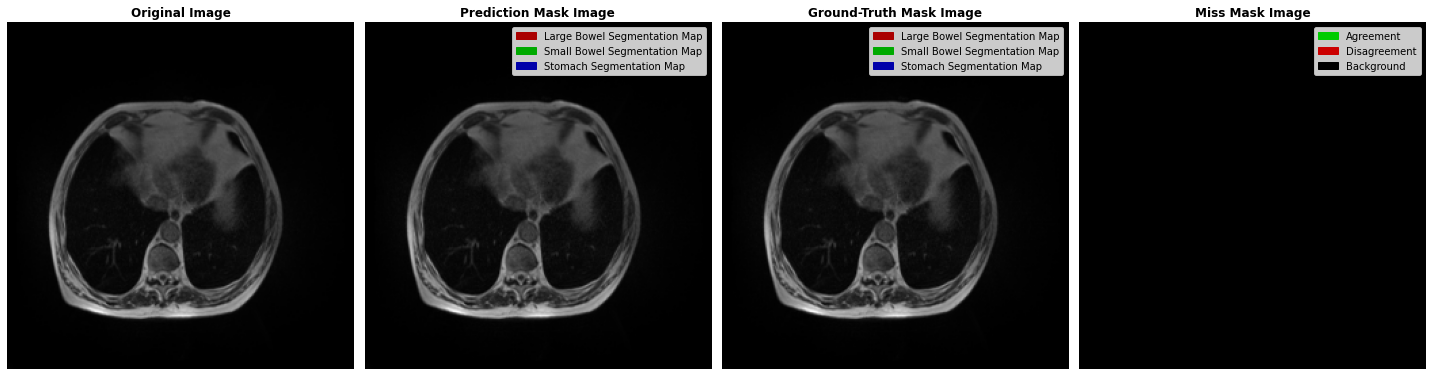

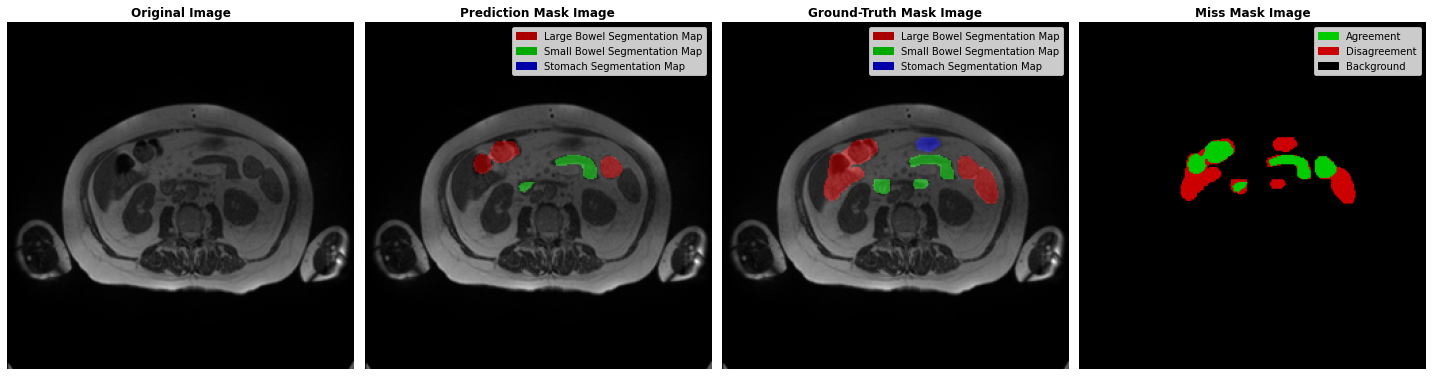

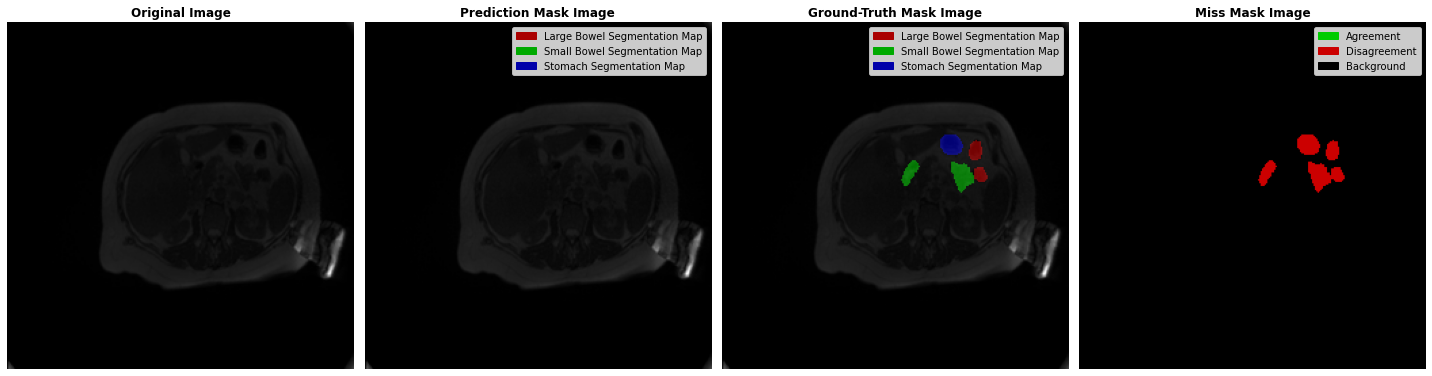

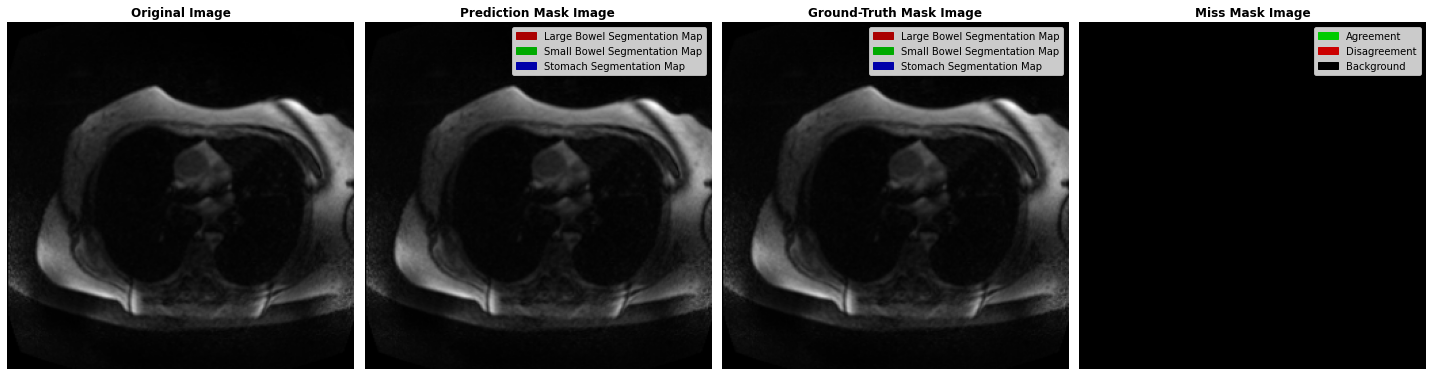

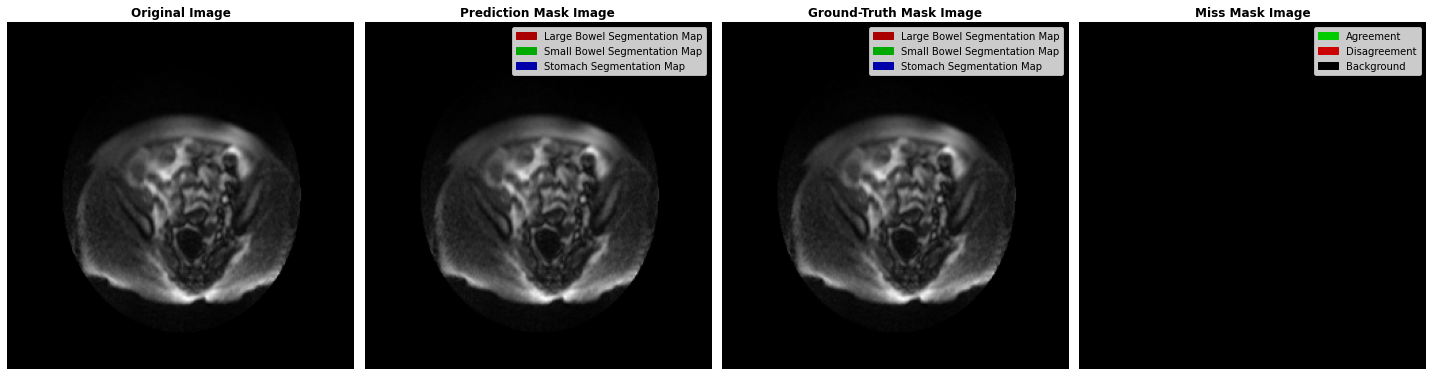

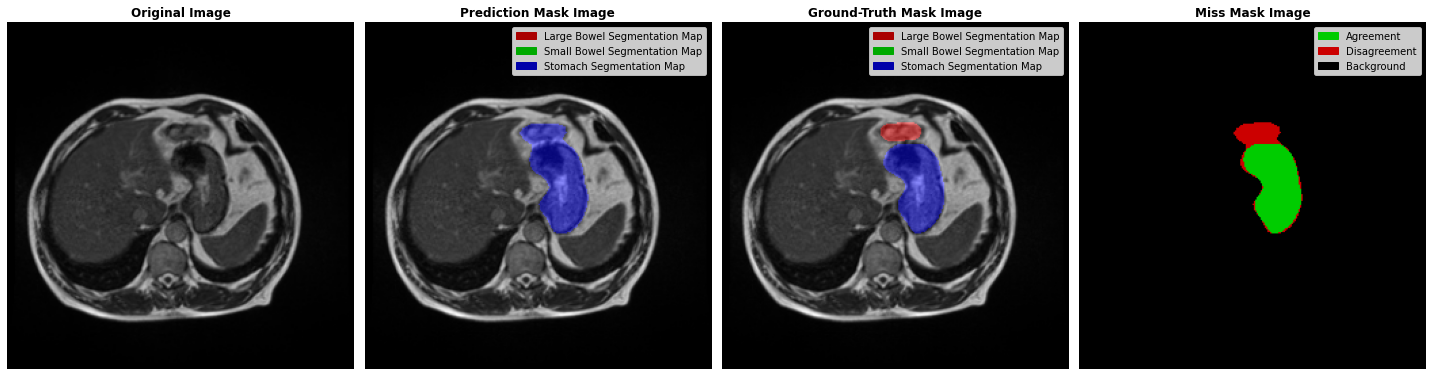

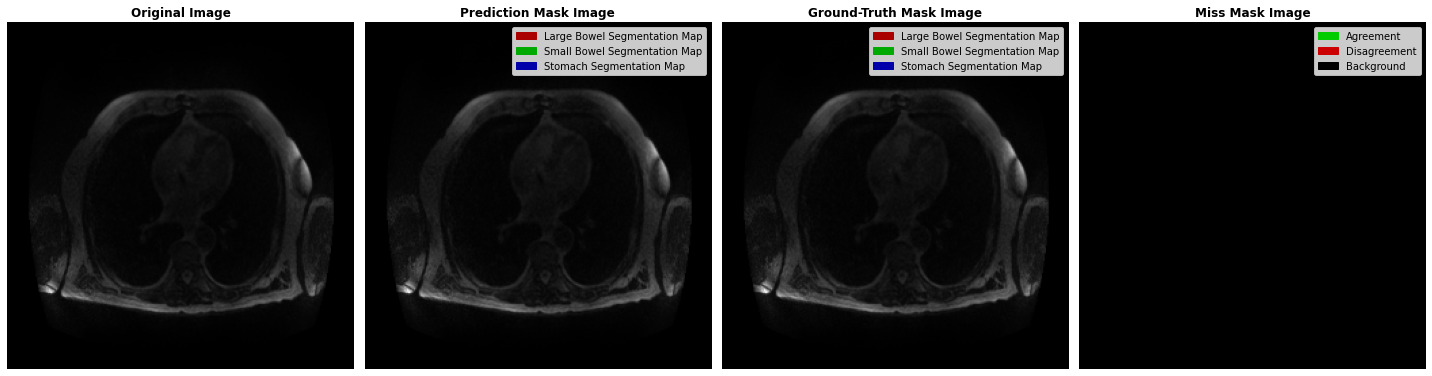

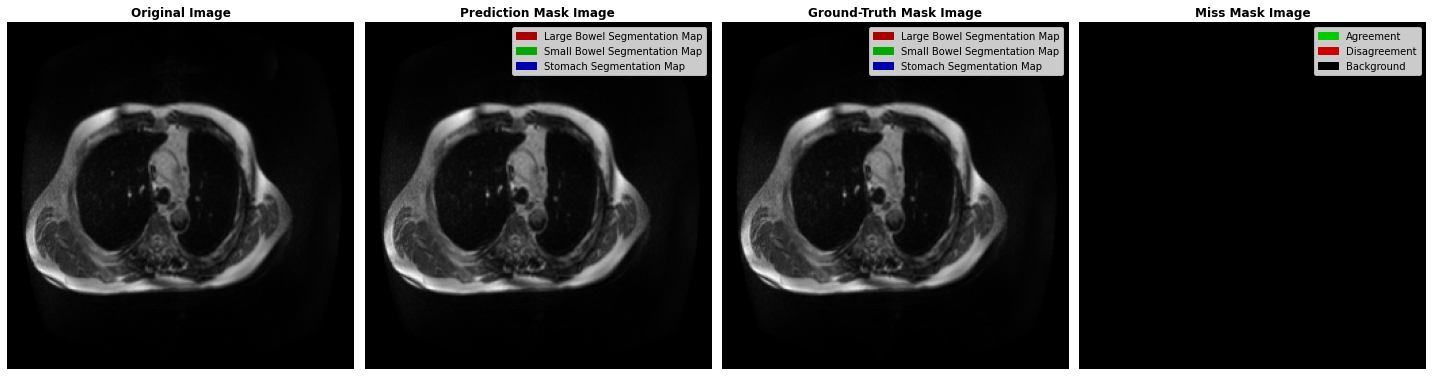

In [31]:
def get_overlay(img, mask, _alpha=0.999, _beta=0.45, _gamma=0):
    
    # Normalize to be between 0-1 (float32)
    img = (img/img.max()).astype(np.float32)
    
    # Make mask RGB and float32
    if len(mask.shape)==2:
        mask_rgb = np.zeros_like(img, dtype=np.float32)
        mask_rgb[..., 2] = np.where(mask==3, 1.0, 0.0)
        mask_rgb[..., 1] = np.where(mask==2, 1.0, 0.0)
        mask_rgb[..., 0] = np.where(mask==1, 1.0, 0.0)
    else:
        mask_rgb=mask.astype(np.float32)
    
    # overlay
    seg_overlay = cv2.addWeighted(src1=img, alpha=_alpha, 
                                  src2=mask_rgb, beta=_beta, gamma=_gamma)
    return seg_overlay

def get_miss_overlay(gt_mask, pred_mask, _alpha=0.9, _beta=0.25, _gamma=0):
    
    # Make mask RGB and float32
    miss_rgb = np.zeros((*pred_mask.shape[:2],3), dtype=np.float32)
    
    if len(pred_mask.shape)==2:
        miss_rgb[..., 1] = np.where((gt_mask==pred_mask)&(gt_mask!=0), 0.8, 0.0)
        miss_rgb[..., 0] = np.where((gt_mask!=pred_mask), 0.8, 0.0)
    else:
        
        miss_rgb = np.where((gt_mask==pred_mask)&(gt_mask!=0.0), (0.0,0.8,0.0), (0.0,0.0,0.0))
        miss_rgb = np.where((gt_mask!=pred_mask), (0.8,0.0,0.0), miss_rgb)
        
    return miss_rgb

def plot_preds(img, pred_mask, gt_mask):
    gt_overlay = get_overlay(img, gt_mask)
    pred_overlay = get_overlay(img, pred_mask)
    miss_overlay = get_miss_overlay(gt_mask, pred_mask)
    
    plt.figure(figsize=(20,12))
    
    for i, (_desc, _img) in enumerate(zip(["Original", "Prediction Mask", "Ground-Truth Mask", "Miss Mask"], [img, pred_overlay, gt_overlay, miss_overlay])):        
        plt.subplot(1,4,i+1)
        plt.imshow(_img)
        plt.title(f"{_desc} Image", fontweight="bold")        
        plt.axis(False)
        
        if i in [1,2]:
            handles = [Rectangle((0,0),1,1, color=_c) for _c in [(0.667,0.0,0.0), (0.0,0.667,0.0), (0.0,0.0,0.667)]]
            labels = ["Large Bowel Segmentation Map", "Small Bowel Segmentation Map", "Stomach Segmentation Map"]
            plt.legend(handles,labels)
        elif i==3:
            handles = [Rectangle((0,0),1,1, color=_c) for _c in [(0.0,0.8,0.0), (0.8,0.0,0.0), (0.0, 0.0, 0.0)]]
            labels = ["Agreement", "Disagreement", "Background"]
            plt.legend(handles,labels)
    plt.tight_layout()
    plt.show()

if DEBUG:
    for img_batch, mask_batch in val_ds.take(1):
        pred_batch = model(img_batch)

        if STYLE=="multilabel":
            pred_batch = np.where(tf.nn.sigmoid(pred_batch)>=0.1, 1.0, 0.0)
        else:
            pred_batch = np.argmax(pred_batch, axis=-1)

        img_batch = ((img_batch+1)*127.5).numpy().astype(np.int32)
        mask_batch = mask_batch.numpy().squeeze().astype(np.float32)
        break

    for _img, _pred, _mask in zip(img_batch, pred_batch, mask_batch):
        plot_preds(_img, _pred, _mask)

<br>


<a id="model_inference"></a>


<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: teal; background-color: #ffffff;" id="model_inference">
    5&nbsp;&nbsp;MODEL INFERENCE&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a>
</h1>

---

**Only run this when things are done as masks will be deleted**

In [32]:
!rm -rf ./multi*

In [33]:
def pred_2_rle(pred_arr, root_shape):
    
    # Get correct size pred array based on initial slice size
    pred_arr = cv2.resize(pred_arr, root_shape, interpolation=cv2.INTER_NEAREST)
    
    # Get individual segmentation masks
    lb_mask = np.where(pred_arr==1,1,0)
    sb_mask = np.where(pred_arr==2,1,0)
    st_mask = np.where(pred_arr==3,1,0)
    
    return rle_encode(lb_mask), rle_encode(sb_mask), rle_encode(st_mask)

N_TEST = int(np.ceil((len(ss_df)//3)/BATCH_SIZE))

# Loop over batches and get prediction
for i, img_batch in tqdm(enumerate(test_ds), total=N_TEST):
    
    # Cleanup every so often
    if i%100==0:
        gc.collect(); gc.collect(); tf.keras.backend.clear_session(); gc.collect()    
    
    # Get predictions
    pred_batch = tf.argmax(model(img_batch, training=False), axis=-1).numpy()
    
    # Loop over prediction and determine submission dataframe index (3*individual-count because of reduced inference size)
    for j, _pred in enumerate(pred_batch):
        df_idx = 3*(i*BATCH_SIZE+j)
        pred_rles = pred_2_rle(_pred, (ss_df.iloc[df_idx]["slice_h"], ss_df.iloc[df_idx]["slice_w"]))
        
        # Loop over rles and assign the correct row of the submission dataframe
        for k,pred_rle in enumerate(pred_rles):
            ss_df.loc[df_idx+k, "predicted"] = pred_rle
            
ss_df = ss_df[["id", "class", "predicted"]]
ss_df.to_csv("submission.csv", index=False)
display(ss_df)

  0%|          | 0/2732 [00:00<?, ?it/s]

,id,class,predicted
0,case123_day20_slice_0001,large_bowel,
1,case123_day20_slice_0001,small_bowel,
2,case123_day20_slice_0001,stomach,
3,case123_day20_slice_0002,large_bowel,
4,case123_day20_slice_0002,small_bowel,
...,...,...,...
65563,case124_day19_slice_0143,small_bowel,
65564,case124_day19_slice_0143,stomach,
65565,case124_day19_slice_0144,large_bowel,
65566,case124_day19_slice_0144,small_bowel,
